In [2224]:
import numpy as np 
import pandas as pd
import warnings 
warnings.filterwarnings('ignore')
import seaborn as sns 
import matplotlib.pyplot as plt

In [2225]:
players_df = pd.read_excel("players.xlsx")
players_df

,player_id,name,last_season,current_club_id,player_code,country_of_birth,date_of_birth,sub_position,position,foot,height_in_cm,market_value_in_eur,highest_market_value_in_eur,contract_expiration_date,agent_name
0,124732,John Anthony Brooks,2023,533,john-anthony-brooks,Germany,1993-01-28,Centre-Back,Defender,left,194.0,2000000.0,15000000.0,2024-06-30,ROGON
1,223047,Emerson Hyndman,2018,903,emerson-hyndman,United States,1996-04-09,Central Midfield,Midfield,right,170.0,800000.0,1800000.0,NaT,OmniSports
2,307781,Lynden Gooch,2016,289,lynden-gooch,United States,1995-12-24,Right Winger,Attack,right,173.0,1000000.0,1000000.0,2024-06-30,Unique Sports Group
3,370846,Timothy Weah,2023,506,timothy-weah,United States,2000-02-22,Right Midfield,Midfield,right,183.0,14000000.0,15000000.0,2028-06-30,BS Group - BS Law
4,484756,Djordje Mihailovic,2023,1090,djordje-mihailovic,United States,1998-11-10,Attacking Midfield,Midfield,NaN,178.0,5000000.0,6000000.0,2026-06-30,YMU Management Ltd.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,273570,Desevio Payne,2020,1283,desevio-payne,United States,1995-11-30,Right-Back,Defender,right,182.0,NaN,400000.0,NaT,NaN
148,111783,Alejandro Bedoya,2015,995,alejandro-bedoya,United States,1987-04-29,Central Midfield,Midfield,right,182.0,300000.0,2500000.0,2023-12-31,YMU Group
149,160670,Joe Gyau,2014,16,joe-gyau,United States,1992-09-16,Left Winger,Attack,both,175.0,400000.0,600000.0,2023-12-31,BR Group Management
150,3476,Brad Friedel,2014,148,brad-friedel,United States,1971-05-18,Goalkeeper,Goalkeeper,NaN,NaN,NaN,4000000.0,NaT,NaN


In [2226]:
apperance_df = pd.read_excel("appearances.xlsx")
apperance_df

,appearance_id,game_id,player_id,date,player_name,competition_id,yellow_cards,red_cards,goals,assists,minutes_played
0,2224728_119169,2224728,119169,2012-07-13,Aron Johannsson,DK1,0,0,0,0,90
1,2224732_161244,2224732,161244,2012-07-14,Conor O'Brien,DK1,0,0,1,0,90
2,2224729_39467,2224729,39467,2012-07-15,Clarence Goodson,DK1,0,0,0,0,90
3,2232104_119169,2232104,119169,2012-07-19,Aron Johannsson,ELQ,0,0,0,0,74
4,2219794_39475,2219794,39475,2012-07-22,Sacha Kljestan,BESC,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...
3563,3415291_537467,3415291,537467,2020-09-26,Joseph Efford,BE1,0,0,1,0,77
3564,3415296_367423,3415296,367423,2020-09-26,Chris Durkin,BE1,1,0,0,0,84
3565,3431983_478940,3431983,478940,2020-09-26,Reggie Cannon,PO1,0,0,0,0,90
3566,3450575_361104,3450575,361104,2020-09-26,Sergino Dest,NL1,0,0,0,0,6


In [2227]:
game_events_df = pd.read_excel("game_events.xlsx")
game_events_df

,game_event_id,date,game_id,minute,type,player_id,description,player_in_id,player_assist_id
0,c6a3c088ed8a38d4ce074dd73b20d3da,2012-08-19,2221641,62,Substitutions,1335,", Not reported",45668.0,NaN
1,02d605a5c2dc4f9a6721daa583fa5405,2012-08-26,2222536,54,Cards,1321,"1. Yellow card , Foul",NaN,NaN
2,b56c2e2e087cddb3cfe9e3d340975df9,2012-11-18,2222707,79,Substitutions,104203,", Tactical",25740.0,NaN
3,4a15d1fff4f476f48bb60092c61641d5,2012-11-23,2222721,72,Substitutions,104203,", Tactical",15583.0,NaN
4,daa97877f7edf2fda885b411d7197921,2013-05-17,2222782,63,Goals,104203,", Right-footed shot, 1. Goal of the Season Ass...",NaN,15077.0
...,...,...,...,...,...,...,...,...,...
1844,4acebccbc824e45d51045d8c5e164341,2023-10-31,4194147,3,Goals,355369,", Left-footed shot, 1. Tournament Goal Assist:...",NaN,284010.0
1845,159ad5633cf9d7c3a97b593efb6c3269,2023-10-31,4194147,9,Goals,355369,", Right-footed shot, 2. Tournament Goal Assist...",NaN,629588.0
1846,daa31f19aab26eec375884aef73c73b3,2023-10-31,4194147,65,Substitutions,355369,", Tactical",544148.0,NaN
1847,869a13060604e769290dafe0b1f14483,2023-11-01,4194152,70,Substitutions,504215,", Tactical",406640.0,NaN


In [2228]:
game_lineups_df =pd.read_excel("game_lineups.xlsx")
game_lineups_df

,game_lineups_id,game_id,type,number,player_id,player_name,team_captain,position
0,f2570d1504fc02f4b6c7608e8dcf89a3,4087925,substitutes,34,242284,Ethan Horvath,0,Goalkeeper
1,f5f0da93ea8e1d8bdd799658e7c8f7cb,4087928,starting_lineup,13,145466,Tim Ream,0,Centre-Back
2,31a4d12ec23d604779d909d26c1b5410,4087929,substitutes,26,578539,Chris Richards,0,Centre-Back
3,776dcbef98651450db76723cb7e3b4df,4087935,substitutes,26,578539,Chris Richards,0,Centre-Back
4,6a35ef7495303f29e7f85dbd54547fb1,4087936,starting_lineup,13,145466,Tim Ream,1,Centre-Back
...,...,...,...,...,...,...,...,...
214,ec3d266094f99ca0a8847de827e37105,4194152,starting_lineup,7,504215,Giovanni Reyna,0,Right Winger
215,667840cda9bdf3b0344b8e99b306cf38,4194152,starting_lineup,23,124732,John Anthony Brooks,0,Centre-Back
216,1c5d2f60ee777760f8a757aa10c42bb1,4194154,starting_lineup,13,103064,Terrence Boyd,0,Centre-Forward
217,99032084fd00ffbfee52c541a9f960ab,4204000,substitutes,14,315762,Luca de la Torre,0,Central Midfield


In [2229]:
games_df =pd.read_excel("games.xlsx")
games_df

,game_id,competition_id,season,round,date,home_club_goals,away_club_goals,home_club_position,away_club_position,home_club_manager_name,away_club_manager_name,stadium,attendance,referee,home_club_formation,away_club_formation,home_club_name,away_club_name,aggregate,competition_type
0,2222734,RU1,2012,19. Matchday,2012-12-07,2,3,11.0,10.0,Miodrag Bozovic,Slavoljub Muslin,Olimp-2,5700.0,Sergey Kuznetsov,NaN,NaN,FK Rostov,FK Krasnodar,02:03:00,domestic_league
1,2224572,DK1,2012,3. Matchday,2012-07-28,1,2,12.0,1.0,Jess Thorup,Lars Sondergaard,Blue Water Arena,5345.0,Michael Svendsen,NaN,NaN,Esbjerg fB,Sonderjyske Fc,01:02:00,domestic_league
2,2224628,DK1,2012,22. Matchday,2013-03-08,2,0,3.0,10.0,Colin Todd,Lars Sondergaard,Cepheus Park Randers,3481.0,Jakob Kehlet,NaN,NaN,Randers Fodbold Club,Sonderjyske Fc,02:00:00,domestic_league
3,2224655,DK1,2012,22. Matchday,2013-03-10,0,3,6.0,12.0,Peter Rensen,Auri Skarbalius,Ceres Park,7967.0,Kenn Hansen,NaN,NaN,Aarhus Gymnastik Forening,BRA NDBYERNES,00:03:00,domestic_league
4,2224729,DK1,2012,1. Matchday,2012-07-15,0,1,9.0,5.0,Auri Skarbalius,Troels Bech,Brondby Stadium,10806.0,Lars Christoffersen,NaN,NaN,Brondby IF,Odense Boldklub,00:01:00,domestic_league
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3263,3296153,NLP,2019,Round of 16,2020-01-22,7,0,NaN,NaN,Erik ten Hag,Eric Meijers,Johan Cruijff ArenA,52017.0,Richard Martens,NaN,NaN,AFC Ajax Amsterdam,NaN,07:00:00,domestic_cup
3264,2875216,DK1,2017,19. Matchday,2017-12-10,3,2,3.0,4.0,Kasper Hjulmand,Thomas Thomasberg,Right to Dream Park,2843.0,Michael Tykgaard,NaN,NaN,Football Club Nords,Hobro IK,03:02:00,domestic_league
3265,3099247,BE1,2018,11. Matchday,2018-10-20,3,1,9.0,7.0,Glen De Boeck,Marc Brys,Guldensporenstadion,6143.0,Wesley Alen,NaN,NaN,Koninklijke Voetbalclub Kortrijk,Koninklijke Sint-Truidense Voetbalvereniging,03:01:00,domestic_league
3266,2872273,GB1,2017,16. Matchday,2017-12-09,5,1,6.0,15.0,Mauricio Pochettino,Mark Hughes,Wembley Stadium,62202.0,Roger East,NaN,NaN,Tottenham Hotspur Football Club,Stoke City,05:01:00,domestic_league


intrepretation:
- I have read the five different excel files

# Sprint - 1

In [2232]:
df_1 = apperance_df.merge(games_df, on='game_id', how='inner')
df_1

,appearance_id,game_id,player_id,date_x,player_name,competition_id_x,yellow_cards,red_cards,goals,assists,...,away_club_manager_name,stadium,attendance,referee,home_club_formation,away_club_formation,home_club_name,away_club_name,aggregate,competition_type
0,2224728_119169,2224728,119169,2012-07-13,Aron Johannsson,DK1,0,0,0,0,...,Kent Nielsen,Ceres Park,9728.0,Michael Svendsen,NaN,NaN,Aarhus Gymnastik Forening,Aalborg BK,01:01:00,domestic_league
1,2224732_161244,2224732,161244,2012-07-14,Conor O'Brien,DK1,0,0,1,0,...,Colin Todd,Sydbank Park,2995.0,Claus Bo Larsen,NaN,NaN,Sonderjyske Fc,Randers Fodbold Club,06:01:00,domestic_league
2,2224729_39467,2224729,39467,2012-07-15,Clarence Goodson,DK1,0,0,0,0,...,Troels Bech,Brondby Stadium,10806.0,Lars Christoffersen,NaN,NaN,Brondby IF,Odense Boldklub,00:01:00,domestic_league
3,2232104_119169,2232104,119169,2012-07-19,Aron Johannsson,ELQ,0,0,0,0,...,Temur Shalamberidze,Ceres Park,9000.0,Boako Jovanetic,NaN,NaN,Aarhus Gymnastik Forening,NaN,01:02:00,international_cup
4,2219794_39475,2219794,39475,2012-07-22,Sacha Kljestan,BESC,0,0,0,0,...,Peter Maes,Constant Vanden Stock Stadion,14485.0,Laurent Colemonts,NaN,NaN,Royal Sporting Club Anderlecht,KSC Lokeren (- 2020),03:02:00,other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3563,3415291_537467,3415291,537467,2020-09-26,Joseph Efford,BE1,0,0,1,0,...,Nicky Hayen,Olympisch Stadion,3200.0,Wesli De Cremer,NaN,NaN,Beerschot V.A.,SK Beveren,03:02:00,domestic_league
3564,3415296_367423,3415296,367423,2020-09-26,Chris Durkin,BE1,1,0,0,0,...,Kevin Muscat,AFAS Stadion,5185.0,Nathan Verboomen,NaN,NaN,Yellow-Red Koninklijke Voetbalclub Mechelen,Koninklijke Sint-Truidense Voetbalvereniging,02:00:00,domestic_league
3565,3431983_478940,3431983,478940,2020-09-26,Reggie Cannon,PO1,0,0,0,0,...,Sergio Conceicao,Estádio do Bessa,NaN,Luís Godinho,NaN,NaN,Boavista Futebol Clube,Futebol Clube do Porto,00:05:00,domestic_league
3566,3450575_361104,3450575,361104,2020-09-26,Sergino Dest,NL1,0,0,0,0,...,Thomas Letsch,Johan Cruijff ArenA,15000.0,Pol van Boekel,NaN,NaN,AFC Ajax Amsterdam,Stichting Betaald Voetbal Vitesse Arnhem,02:01:00,domestic_league


Intrepretation:
- i have merged the 2 excel files into one by using merge() with common column.

In [2234]:
df_2 = df_1.merge(game_events_df, on=['game_id','player_id'] , how='inner')
df_2.columns
# here 'game_id'

Index(['appearance_id', 'game_id', 'player_id', 'date_x', 'player_name',
       'competition_id_x', 'yellow_cards', 'red_cards', 'goals', 'assists',
       'minutes_played', 'competition_id_y', 'season', 'round', 'date_y',
       'home_club_goals', 'away_club_goals', 'home_club_position',
       'away_club_position', 'home_club_manager_name',
       'away_club_manager_name', 'stadium', 'attendance', 'referee',
       'home_club_formation', 'away_club_formation', 'home_club_name',
       'away_club_name', 'aggregate', 'competition_type', 'game_event_id',
       'date', 'minute', 'type', 'description', 'player_in_id',
       'player_assist_id'],
      dtype='object')

intrepretation:
- i followed the same process with the data which already merged with another file

In [2236]:
df_3 = df_2.drop(columns=['competition_id_y', 'date_x', 'date_y','player_assist_id'], axis=1)
df_3

,appearance_id,game_id,player_id,player_name,competition_id_x,yellow_cards,red_cards,goals,assists,minutes_played,...,home_club_name,away_club_name,aggregate,competition_type,game_event_id,date,minute,type,description,player_in_id
0,2224732_161244,2224732,161244,Conor O'Brien,DK1,0,0,1,0,90,...,Sonderjyske Fc,Randers Fodbold Club,06:01:00,domestic_league,d9f02a9d767f319e58909ba1e1de6d23,2012-07-14,50,Goals,", Long distance kick, 1. Goal of the Season As...",NaN
1,2232104_119169,2232104,119169,Aron Johannsson,ELQ,0,0,0,0,74,...,Aarhus Gymnastik Forening,NaN,01:02:00,international_cup,2ab0ea7af8313c0da07c723728bb6a49,2012-07-19,74,Substitutions,", Not reported",174001.0
2,2224560_39467,2224560,39467,Clarence Goodson,DK1,1,0,0,0,90,...,Aalborg BK,BRA NDBYERNES,02:01:00,domestic_league,e7631c64f9a922d4370ba6db39ccbfac,2012-07-22,60,Cards,"1. Yellow card , Foul",NaN
3,2224569_161244,2224569,161244,Conor O'Brien,DK1,1,0,0,1,90,...,Sonderjyske Fc,Football Club Ka Benhavn,01:01:00,domestic_league,abe3da42c64790a4c4ae00ff82c3024f,2012-07-22,68,Cards,"1. Yellow card , Foul",NaN
4,2224568_119169,2224568,119169,Aron Johannsson,DK1,0,0,0,0,73,...,Aarhus Gymnastik Forening,Esbjerg fB,00:00:00,domestic_league,1b4e309dd87c3a8f86e0675b9b29d36c,2012-07-23,73,Substitutions,", Tactical",24282.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1117,3450613_315762,3450613,315762,Luca de la Torre,NL1,0,0,0,0,58,...,Willem II Tilburg,Heracles Almelo,04:00:00,domestic_league,027c17a496d567bce24280628ee1bce2,2020-09-20,58,Substitutions,NaN,446247.0
1118,3412906_393325,3412906,393325,Josh Sargent,L1,0,0,0,1,87,...,FC Schalke 04,Sportverein Werder Bremen von 1899,01:03:00,domestic_league,e22f77951e979538ff2e0c1fa1fd0611,2020-09-26,87,Substitutions,NaN,344830.0
1119,3415291_537467,3415291,537467,Joseph Efford,BE1,0,0,1,0,77,...,Beerschot V.A.,SK Beveren,03:02:00,domestic_league,3e0892bd11f50a5259b22e5c43755ada,2020-09-26,11,Goals,", Right-footed shot, 2. Goal of the Season",NaN
1120,3415291_537467,3415291,537467,Joseph Efford,BE1,0,0,1,0,77,...,Beerschot V.A.,SK Beveren,03:02:00,domestic_league,2c1bc4101fb8b426e84b9b5d55eb5783,2020-09-26,77,Substitutions,NaN,358907.0


intrepretation:
- i'm dropping the columns which are duplicated and full of null values.

In [2238]:
df_3.columns

Index(['appearance_id', 'game_id', 'player_id', 'player_name',
       'competition_id_x', 'yellow_cards', 'red_cards', 'goals', 'assists',
       'minutes_played', 'season', 'round', 'home_club_goals',
       'away_club_goals', 'home_club_position', 'away_club_position',
       'home_club_manager_name', 'away_club_manager_name', 'stadium',
       'attendance', 'referee', 'home_club_formation', 'away_club_formation',
       'home_club_name', 'away_club_name', 'aggregate', 'competition_type',
       'game_event_id', 'date', 'minute', 'type', 'description',
       'player_in_id'],
      dtype='object')

In [2239]:
merged_df_3 = df_3.merge(game_lineups_df, on=['player_id'], how='inner')
merged_df_3

,appearance_id,game_id_x,player_id,player_name_x,competition_id_x,yellow_cards,red_cards,goals,assists,minutes_played,...,type_x,description,player_in_id,game_lineups_id,game_id_y,type_y,number,player_name_y,team_captain,position
0,2231426_49723,2231426,49723,Timothy Chandler,L1,0,0,0,0,70,...,Substitutions,", Not reported",60957.0,8d717b1017e72d89d2ee1112bb2d7466,4096025,substitutes,22,Timothy Chandler,0,Right-Back
1,2231426_49723,2231426,49723,Timothy Chandler,L1,0,0,0,0,70,...,Substitutions,", Not reported",60957.0,d53eb3fd74523d6dd4536653c145ae96,4096042,substitutes,22,Timothy Chandler,0,Right-Back
2,2231426_49723,2231426,49723,Timothy Chandler,L1,0,0,0,0,70,...,Substitutions,", Not reported",60957.0,3efc21c645e46b2f411bcdb1710aa444,4096061,substitutes,22,Timothy Chandler,0,Right-Back
3,2231426_49723,2231426,49723,Timothy Chandler,L1,0,0,0,0,70,...,Substitutions,", Not reported",60957.0,cc79e78c570ce19872dfed125d324407,4162615,substitutes,22,Timothy Chandler,0,Right-Back
4,2231426_49723,2231426,49723,Timothy Chandler,L1,0,0,0,0,70,...,Substitutions,", Not reported",60957.0,21de58902f547e231bf2604be9fa996f,4162639,substitutes,22,Timothy Chandler,0,Right-Back
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3632,3415291_537467,3415291,537467,Joseph Efford,BE1,0,0,1,0,77,...,Substitutions,NaN,358907.0,26085977dac1dc934abb39888f128636,4120867,substitutes,11,Joseph Efford,0,Centre-Forward
3633,3415291_537467,3415291,537467,Joseph Efford,BE1,0,0,1,0,77,...,Substitutions,NaN,358907.0,eadce2f0ce9f400d0561a8c05453d702,4150507,substitutes,28,Joseph Efford,0,Centre-Forward
3634,3415291_537467,3415291,537467,Joseph Efford,BE1,0,0,1,0,77,...,Substitutions,NaN,358907.0,bc79183aa9a1ffacb14cc733f6143411,4150562,substitutes,28,Joseph Efford,0,Centre-Forward
3635,3415291_537467,3415291,537467,Joseph Efford,BE1,0,0,1,0,77,...,Substitutions,NaN,358907.0,e16817800f83daf7bad1ddabf58316b7,4150625,substitutes,28,Joseph Efford,0,Centre-Forward


In [2240]:
merged_df_3 = merged_df_3.drop(columns = 'player_name_y' ,axis=1)
merged_df_3

,appearance_id,game_id_x,player_id,player_name_x,competition_id_x,yellow_cards,red_cards,goals,assists,minutes_played,...,minute,type_x,description,player_in_id,game_lineups_id,game_id_y,type_y,number,team_captain,position
0,2231426_49723,2231426,49723,Timothy Chandler,L1,0,0,0,0,70,...,70,Substitutions,", Not reported",60957.0,8d717b1017e72d89d2ee1112bb2d7466,4096025,substitutes,22,0,Right-Back
1,2231426_49723,2231426,49723,Timothy Chandler,L1,0,0,0,0,70,...,70,Substitutions,", Not reported",60957.0,d53eb3fd74523d6dd4536653c145ae96,4096042,substitutes,22,0,Right-Back
2,2231426_49723,2231426,49723,Timothy Chandler,L1,0,0,0,0,70,...,70,Substitutions,", Not reported",60957.0,3efc21c645e46b2f411bcdb1710aa444,4096061,substitutes,22,0,Right-Back
3,2231426_49723,2231426,49723,Timothy Chandler,L1,0,0,0,0,70,...,70,Substitutions,", Not reported",60957.0,cc79e78c570ce19872dfed125d324407,4162615,substitutes,22,0,Right-Back
4,2231426_49723,2231426,49723,Timothy Chandler,L1,0,0,0,0,70,...,70,Substitutions,", Not reported",60957.0,21de58902f547e231bf2604be9fa996f,4162639,substitutes,22,0,Right-Back
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3632,3415291_537467,3415291,537467,Joseph Efford,BE1,0,0,1,0,77,...,77,Substitutions,NaN,358907.0,26085977dac1dc934abb39888f128636,4120867,substitutes,11,0,Centre-Forward
3633,3415291_537467,3415291,537467,Joseph Efford,BE1,0,0,1,0,77,...,77,Substitutions,NaN,358907.0,eadce2f0ce9f400d0561a8c05453d702,4150507,substitutes,28,0,Centre-Forward
3634,3415291_537467,3415291,537467,Joseph Efford,BE1,0,0,1,0,77,...,77,Substitutions,NaN,358907.0,bc79183aa9a1ffacb14cc733f6143411,4150562,substitutes,28,0,Centre-Forward
3635,3415291_537467,3415291,537467,Joseph Efford,BE1,0,0,1,0,77,...,77,Substitutions,NaN,358907.0,e16817800f83daf7bad1ddabf58316b7,4150625,substitutes,28,0,Centre-Forward


In [2241]:
merged_df_4 = merged_df_3.merge(players_df, on=['player_id'], how='inner')
merged_df_4

,appearance_id,game_id_x,player_id,player_name_x,competition_id_x,yellow_cards,red_cards,goals,assists,minutes_played,...,country_of_birth,date_of_birth,sub_position,position_y,foot,height_in_cm,market_value_in_eur,highest_market_value_in_eur,contract_expiration_date,agent_name
0,2231426_49723,2231426,49723,Timothy Chandler,L1,0,0,0,0,70,...,Germany,1990-03-29,Right-Back,Defender,right,186.0,700000.0,5000000.0,2025-06-30,NaN
1,2231426_49723,2231426,49723,Timothy Chandler,L1,0,0,0,0,70,...,Germany,1990-03-29,Right-Back,Defender,right,186.0,700000.0,5000000.0,2025-06-30,NaN
2,2231426_49723,2231426,49723,Timothy Chandler,L1,0,0,0,0,70,...,Germany,1990-03-29,Right-Back,Defender,right,186.0,700000.0,5000000.0,2025-06-30,NaN
3,2231426_49723,2231426,49723,Timothy Chandler,L1,0,0,0,0,70,...,Germany,1990-03-29,Right-Back,Defender,right,186.0,700000.0,5000000.0,2025-06-30,NaN
4,2231426_49723,2231426,49723,Timothy Chandler,L1,0,0,0,0,70,...,Germany,1990-03-29,Right-Back,Defender,right,186.0,700000.0,5000000.0,2025-06-30,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3632,3415291_537467,3415291,537467,Joseph Efford,BE1,0,0,1,0,77,...,United States,1996-08-29,Centre-Forward,Attack,right,176.0,300000.0,600000.0,2026-06-30,TOP Agency
3633,3415291_537467,3415291,537467,Joseph Efford,BE1,0,0,1,0,77,...,United States,1996-08-29,Centre-Forward,Attack,right,176.0,300000.0,600000.0,2026-06-30,TOP Agency
3634,3415291_537467,3415291,537467,Joseph Efford,BE1,0,0,1,0,77,...,United States,1996-08-29,Centre-Forward,Attack,right,176.0,300000.0,600000.0,2026-06-30,TOP Agency
3635,3415291_537467,3415291,537467,Joseph Efford,BE1,0,0,1,0,77,...,United States,1996-08-29,Centre-Forward,Attack,right,176.0,300000.0,600000.0,2026-06-30,TOP Agency


In [2242]:
merged_df_4_ = merged_df_4.drop( columns = 'player_name_x' , axis = 1)
merged_df_4_

,appearance_id,game_id_x,player_id,competition_id_x,yellow_cards,red_cards,goals,assists,minutes_played,season,...,country_of_birth,date_of_birth,sub_position,position_y,foot,height_in_cm,market_value_in_eur,highest_market_value_in_eur,contract_expiration_date,agent_name
0,2231426_49723,2231426,49723,L1,0,0,0,0,70,2012,...,Germany,1990-03-29,Right-Back,Defender,right,186.0,700000.0,5000000.0,2025-06-30,NaN
1,2231426_49723,2231426,49723,L1,0,0,0,0,70,2012,...,Germany,1990-03-29,Right-Back,Defender,right,186.0,700000.0,5000000.0,2025-06-30,NaN
2,2231426_49723,2231426,49723,L1,0,0,0,0,70,2012,...,Germany,1990-03-29,Right-Back,Defender,right,186.0,700000.0,5000000.0,2025-06-30,NaN
3,2231426_49723,2231426,49723,L1,0,0,0,0,70,2012,...,Germany,1990-03-29,Right-Back,Defender,right,186.0,700000.0,5000000.0,2025-06-30,NaN
4,2231426_49723,2231426,49723,L1,0,0,0,0,70,2012,...,Germany,1990-03-29,Right-Back,Defender,right,186.0,700000.0,5000000.0,2025-06-30,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3632,3415291_537467,3415291,537467,BE1,0,0,1,0,77,2020,...,United States,1996-08-29,Centre-Forward,Attack,right,176.0,300000.0,600000.0,2026-06-30,TOP Agency
3633,3415291_537467,3415291,537467,BE1,0,0,1,0,77,2020,...,United States,1996-08-29,Centre-Forward,Attack,right,176.0,300000.0,600000.0,2026-06-30,TOP Agency
3634,3415291_537467,3415291,537467,BE1,0,0,1,0,77,2020,...,United States,1996-08-29,Centre-Forward,Attack,right,176.0,300000.0,600000.0,2026-06-30,TOP Agency
3635,3415291_537467,3415291,537467,BE1,0,0,1,0,77,2020,...,United States,1996-08-29,Centre-Forward,Attack,right,176.0,300000.0,600000.0,2026-06-30,TOP Agency


In [2243]:
merged_df_4_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3637 entries, 0 to 3636
Data columns (total 52 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   appearance_id                3637 non-null   object        
 1   game_id_x                    3637 non-null   int64         
 2   player_id                    3637 non-null   int64         
 3   competition_id_x             3637 non-null   object        
 4   yellow_cards                 3637 non-null   int64         
 5   red_cards                    3637 non-null   int64         
 6   goals                        3637 non-null   int64         
 7   assists                      3637 non-null   int64         
 8   minutes_played               3637 non-null   int64         
 9   season                       3637 non-null   int64         
 10  round                        3637 non-null   object        
 11  home_club_goals              3637 non-null 

In [2244]:
merged_df_4__ = merged_df_4_.drop(columns=['home_club_formation','away_club_formation'], axis=1)
merged_df_4__

,appearance_id,game_id_x,player_id,competition_id_x,yellow_cards,red_cards,goals,assists,minutes_played,season,...,country_of_birth,date_of_birth,sub_position,position_y,foot,height_in_cm,market_value_in_eur,highest_market_value_in_eur,contract_expiration_date,agent_name
0,2231426_49723,2231426,49723,L1,0,0,0,0,70,2012,...,Germany,1990-03-29,Right-Back,Defender,right,186.0,700000.0,5000000.0,2025-06-30,NaN
1,2231426_49723,2231426,49723,L1,0,0,0,0,70,2012,...,Germany,1990-03-29,Right-Back,Defender,right,186.0,700000.0,5000000.0,2025-06-30,NaN
2,2231426_49723,2231426,49723,L1,0,0,0,0,70,2012,...,Germany,1990-03-29,Right-Back,Defender,right,186.0,700000.0,5000000.0,2025-06-30,NaN
3,2231426_49723,2231426,49723,L1,0,0,0,0,70,2012,...,Germany,1990-03-29,Right-Back,Defender,right,186.0,700000.0,5000000.0,2025-06-30,NaN
4,2231426_49723,2231426,49723,L1,0,0,0,0,70,2012,...,Germany,1990-03-29,Right-Back,Defender,right,186.0,700000.0,5000000.0,2025-06-30,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3632,3415291_537467,3415291,537467,BE1,0,0,1,0,77,2020,...,United States,1996-08-29,Centre-Forward,Attack,right,176.0,300000.0,600000.0,2026-06-30,TOP Agency
3633,3415291_537467,3415291,537467,BE1,0,0,1,0,77,2020,...,United States,1996-08-29,Centre-Forward,Attack,right,176.0,300000.0,600000.0,2026-06-30,TOP Agency
3634,3415291_537467,3415291,537467,BE1,0,0,1,0,77,2020,...,United States,1996-08-29,Centre-Forward,Attack,right,176.0,300000.0,600000.0,2026-06-30,TOP Agency
3635,3415291_537467,3415291,537467,BE1,0,0,1,0,77,2020,...,United States,1996-08-29,Centre-Forward,Attack,right,176.0,300000.0,600000.0,2026-06-30,TOP Agency


intrepretation:
- im dropping these column bcoz it is full of null values

In [2246]:
#changing the variable
merged_data = merged_df_4__
merged_data.isnull().sum()

appearance_id                     0
game_id_x                         0
player_id                         0
competition_id_x                  0
yellow_cards                      0
red_cards                         0
goals                             0
assists                           0
minutes_played                    0
season                            0
round                             0
home_club_goals                   0
away_club_goals                   0
home_club_position              677
away_club_position              677
home_club_manager_name            0
away_club_manager_name            0
stadium                           0
attendance                      324
referee                          22
home_club_name                  198
away_club_name                   22
aggregate                         0
competition_type                  0
game_event_id                     0
date                              0
minute                            0
type_x                      

intrepretation:
- im checking the information of the merged_data

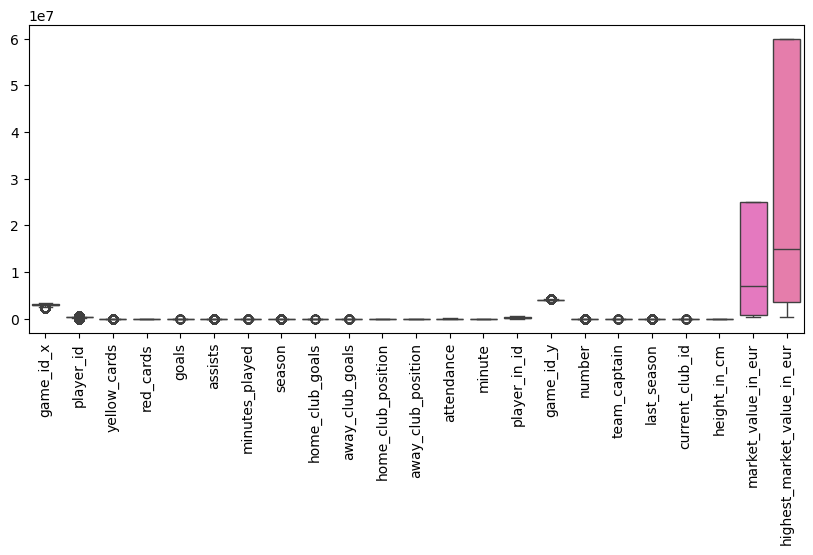

In [2248]:
sns.boxplot(merged_data)
plt.gcf().set_size_inches(10,4)
plt.xticks(rotation = 90)
plt.show()

intrepretation:
- im checking the merged_data whether it has outlier by plotting the boxplot , now it has outliers in many columns but i wasn't tretating the outliers becoz most of the columns are in binary values like ( 0 and 1) and other column are not treatable bcoz its like id,goals,season etc.. 

# SQL connect

In [2251]:
#pip install mysql-connector-python #--> installing the package

In [2252]:
#import pymysql as py #--> libraray to install packages
#!pip install ipykernel
#!pip install pymysql


In [2253]:
#db=py.connect(host="localhost",user="root",password="naveender123",database="pythonconnect")
#mycursor=db.cursor()

In [2254]:
#mycursor.execute("select VERSION()")

In [2255]:
#mycursor.fetchone()

In [2256]:
#from sqlalchemy import create_engine

In [2257]:
#hostname="localhost"
#dbname="pythonconnect"
#uname="root"
#pwd="naveender123"
#engine=create_engine("mysql+pymysql://{user}:{pw}@{host}/{db}".format(host=hostname,db=dbname,user=uname,pw=pwd))
#merged_data.to_sql("football_data_merged",engine,index=False)

Interpretation:
- here i have uploaded the data to the mysql.

In [2259]:
#descriptive analysis for particular columns
desc_col = merged_data[['goals','assists','sub_position','market_value_in_eur','yellow_cards','red_cards','minutes_played']].describe()
desc_col

,goals,assists,market_value_in_eur,yellow_cards,red_cards,minutes_played
count,3637.000000,3637.000000,3.633000e+03,3637.000000,3637.0,3637.000000
mean,0.482541,0.143250,1.159037e+07,0.154523,0.0,70.009348
std,0.612516,0.372444,1.084409e+07,0.361499,0.0,20.993278
min,0.000000,0.000000,3.000000e+05,0.000000,0.0,6.000000
25%,0.000000,0.000000,8.000000e+05,0.000000,0.0,60.000000
50%,0.000000,0.000000,7.000000e+06,0.000000,0.0,75.000000
75%,1.000000,0.000000,2.500000e+07,0.000000,0.0,88.000000
max,3.000000,2.000000,2.500000e+07,1.000000,0.0,120.000000


In [2260]:
for i in desc_col.columns:
    merged_data[i].var()
    print(f"{i} : ", merged_data[i].var())


goals :  0.37517638208693055
assists :  0.13871473757219496
market_value_in_eur :  117594276655589.47
yellow_cards :  0.1306815449210656
red_cards :  0.0
minutes_played :  440.7177343662248


intrepretation:
- here i have described the values for required numerical columns and calculated the variance separately.

In [2262]:
merged_data.isnull().sum()

appearance_id                     0
game_id_x                         0
player_id                         0
competition_id_x                  0
yellow_cards                      0
red_cards                         0
goals                             0
assists                           0
minutes_played                    0
season                            0
round                             0
home_club_goals                   0
away_club_goals                   0
home_club_position              677
away_club_position              677
home_club_manager_name            0
away_club_manager_name            0
stadium                           0
attendance                      324
referee                          22
home_club_name                  198
away_club_name                   22
aggregate                         0
competition_type                  0
game_event_id                     0
date                              0
minute                            0
type_x                      

In [2263]:
Num_col=merged_data.select_dtypes(include="number")
Num_col.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3637 entries, 0 to 3636
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   game_id_x                    3637 non-null   int64  
 1   player_id                    3637 non-null   int64  
 2   yellow_cards                 3637 non-null   int64  
 3   red_cards                    3637 non-null   int64  
 4   goals                        3637 non-null   int64  
 5   assists                      3637 non-null   int64  
 6   minutes_played               3637 non-null   int64  
 7   season                       3637 non-null   int64  
 8   home_club_goals              3637 non-null   int64  
 9   away_club_goals              3637 non-null   int64  
 10  home_club_position           2960 non-null   float64
 11  away_club_position           2960 non-null   float64
 12  attendance                   3313 non-null   float64
 13  minute            

In [2264]:
cat_col=merged_data.select_dtypes(exclude=["number"])
cat_col.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3637 entries, 0 to 3636
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   appearance_id             3637 non-null   object        
 1   competition_id_x          3637 non-null   object        
 2   round                     3637 non-null   object        
 3   home_club_manager_name    3637 non-null   object        
 4   away_club_manager_name    3637 non-null   object        
 5   stadium                   3637 non-null   object        
 6   referee                   3615 non-null   object        
 7   home_club_name            3439 non-null   object        
 8   away_club_name            3615 non-null   object        
 9   aggregate                 3637 non-null   object        
 10  competition_type          3637 non-null   object        
 11  game_event_id             3637 non-null   object        
 12  date                

In [2265]:
cat_col.isnull().sum()

appearance_id                  0
competition_id_x               0
round                          0
home_club_manager_name         0
away_club_manager_name         0
stadium                        0
referee                       22
home_club_name               198
away_club_name                22
aggregate                      0
competition_type               0
game_event_id                  0
date                           0
type_x                         0
description                 2195
game_lineups_id                0
type_y                         0
position_x                     0
name                           0
player_code                    0
country_of_birth               0
date_of_birth                  0
sub_position                   0
position_y                     0
foot                           0
contract_expiration_date      12
agent_name                  1776
dtype: int64

In [2266]:
for i in Num_col.columns:
    merged_data[i]=merged_data[i].fillna(merged_data[i].mean())
for j in cat_col.columns:
    merged_data[j]=merged_data[j].fillna(merged_data[j].mode()[0])

In [2267]:
cat_col.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3637 entries, 0 to 3636
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   appearance_id             3637 non-null   object        
 1   competition_id_x          3637 non-null   object        
 2   round                     3637 non-null   object        
 3   home_club_manager_name    3637 non-null   object        
 4   away_club_manager_name    3637 non-null   object        
 5   stadium                   3637 non-null   object        
 6   referee                   3615 non-null   object        
 7   home_club_name            3439 non-null   object        
 8   away_club_name            3615 non-null   object        
 9   aggregate                 3637 non-null   object        
 10  competition_type          3637 non-null   object        
 11  game_event_id             3637 non-null   object        
 12  date                

intrepretation:
- im checking the null values and treating the null values by using fillna() and  filling the mean values for numerical columns and mode values for the  categorical columns.

In [2269]:
merged_data.isnull().sum()

appearance_id                  0
game_id_x                      0
player_id                      0
competition_id_x               0
yellow_cards                   0
red_cards                      0
goals                          0
assists                        0
minutes_played                 0
season                         0
round                          0
home_club_goals                0
away_club_goals                0
home_club_position             0
away_club_position             0
home_club_manager_name         0
away_club_manager_name         0
stadium                        0
attendance                     0
referee                        0
home_club_name                 0
away_club_name                 0
aggregate                      0
competition_type               0
game_event_id                  0
date                           0
minute                         0
type_x                         0
description                    0
player_in_id                   0
game_lineu

In [2270]:
merged_data.to_excel("capstone_project_merged_data.xlsx",index = False)

intrepretaion:
- after treating the null values the data is cleaned so, im converting the data to excel file.

# Sprint - 3

# probability

1)Probability of Scoring a Goal:
- What is the probability that a randomly selected player has scored at least one goal in a match?



In [2275]:
total_players = len(merged_data)
players_scored = len(merged_data[merged_data['goals'] > 0])

In [2276]:
prob_scoring_goal = players_scored / total_players

In [2277]:
prob_scoring_goal

0.43139950508660985

intrepretation:
- i have taken the total length of the player and also taking the players who scored more than zero goal , now im diving players scored/ total players.

2)Probability of Receiving a Yellow Card:
- What is the probability that a randomly selected player has received a yellow card in a match?



In [2280]:
players_yellow_card = len(merged_data[merged_data['yellow_cards'] > 0])

In [2281]:
prob_yellow_card = players_yellow_card / total_players

In [2282]:
prob_yellow_card

0.1545229584822656

intrepretation:
- i have taken the total length of the player and also taking the players who got more than zero yellow card , now im diving players scored/ total players.

3)Conditional Probability - Assists Given Goals:
- If a player has scored a goal in a match, what is the probability that they also provided an assist?


In [2285]:
players_scored_and_assisted = len(merged_data[(merged_data['goals'] > 0) & (merged_data['assists'] > 0)])


In [2286]:
prob_assist_given_goal = players_scored_and_assisted / players_scored

In [2287]:
prob_assist_given_goal

0.15678776290630975

intrepretation:
- im taking the length of the people who scored a goal and also assited to score (players_scored_and_assisted) and diving with the playe. scored 

4)Joint Probability - Goals and Red Cards:
- What is the probability that a player both scored a goal and received a red card in the same match?

In [2290]:
players_scored_and_red_card = len(merged_data[(merged_data['goals'] > 0) & (merged_data['red_cards'] > 0)])

In [2291]:
prob_goal_and_red_card = players_scored_and_red_card / total_players
prob_goal_and_red_card

0.0

intrepretation:
- i have took the player who scored and also got a red card divided by total players, and there is no one got red card so the probability is zero.

# CLT

In [2294]:
import math as m
import statistics as st
from scipy.stats import skew,kurtosis,norm,t

In [2295]:
merged_data

,appearance_id,game_id_x,player_id,competition_id_x,yellow_cards,red_cards,goals,assists,minutes_played,season,...,country_of_birth,date_of_birth,sub_position,position_y,foot,height_in_cm,market_value_in_eur,highest_market_value_in_eur,contract_expiration_date,agent_name
0,2231426_49723,2231426,49723,L1,0,0,0,0,70,2012,...,Germany,1990-03-29,Right-Back,Defender,right,186.0,700000.0,5000000.0,2025-06-30,Wasserman
1,2231426_49723,2231426,49723,L1,0,0,0,0,70,2012,...,Germany,1990-03-29,Right-Back,Defender,right,186.0,700000.0,5000000.0,2025-06-30,Wasserman
2,2231426_49723,2231426,49723,L1,0,0,0,0,70,2012,...,Germany,1990-03-29,Right-Back,Defender,right,186.0,700000.0,5000000.0,2025-06-30,Wasserman
3,2231426_49723,2231426,49723,L1,0,0,0,0,70,2012,...,Germany,1990-03-29,Right-Back,Defender,right,186.0,700000.0,5000000.0,2025-06-30,Wasserman
4,2231426_49723,2231426,49723,L1,0,0,0,0,70,2012,...,Germany,1990-03-29,Right-Back,Defender,right,186.0,700000.0,5000000.0,2025-06-30,Wasserman
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3632,3415291_537467,3415291,537467,BE1,0,0,1,0,77,2020,...,United States,1996-08-29,Centre-Forward,Attack,right,176.0,300000.0,600000.0,2026-06-30,TOP Agency
3633,3415291_537467,3415291,537467,BE1,0,0,1,0,77,2020,...,United States,1996-08-29,Centre-Forward,Attack,right,176.0,300000.0,600000.0,2026-06-30,TOP Agency
3634,3415291_537467,3415291,537467,BE1,0,0,1,0,77,2020,...,United States,1996-08-29,Centre-Forward,Attack,right,176.0,300000.0,600000.0,2026-06-30,TOP Agency
3635,3415291_537467,3415291,537467,BE1,0,0,1,0,77,2020,...,United States,1996-08-29,Centre-Forward,Attack,right,176.0,300000.0,600000.0,2026-06-30,TOP Agency


In [2296]:
p_mean=st.mean(merged_data["minutes_played"])
print("p_mean :",p_mean)
p_std=st.stdev(merged_data["minutes_played"])
print("p_std :",p_std)
p_skew=skew(merged_data["minutes_played"])
print("p_skew :" ,p_skew)
p_kurtosis=kurtosis(merged_data["minutes_played"])
print("p_kurtosis :",p_kurtosis)

p_mean : 70.0093483640363
p_std : 20.993278313932603
p_skew : -0.9632473992438372
p_kurtosis : 0.6023532964332734


In [2297]:
sample_data=pd.DataFrame()
for i in range(0,20):
    sample_data["sample"+str(i)]=merged_data["minutes_played"].sample(frac=0.2,replace=True,ignore_index=True)
sample_data

,sample0,sample1,sample2,sample3,sample4,sample5,sample6,sample7,sample8,sample9,sample10,sample11,sample12,sample13,sample14,sample15,sample16,sample17,sample18,sample19
0,45,45,46,58,75,45,68,81,90,90,88,58,11,24,90,58,71,58,90,87
1,61,84,79,58,45,90,90,73,11,81,61,90,82,79,77,75,90,80,90,90
2,90,45,68,82,90,84,73,57,64,63,82,76,75,79,58,55,37,90,72,73
3,90,90,90,54,74,27,77,79,90,40,72,13,90,21,57,90,90,78,90,45
4,90,45,55,66,65,57,90,77,64,70,84,27,84,61,90,81,45,90,84,67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
722,85,74,85,72,62,74,80,65,61,19,90,32,37,71,45,67,60,86,81,56
723,66,78,90,90,67,68,57,90,33,69,57,83,90,78,58,90,22,84,85,70
724,78,90,79,82,84,90,90,46,70,90,11,90,72,82,82,73,90,90,54,31
725,77,90,90,72,78,64,62,64,40,78,45,90,23,86,90,56,68,82,81,45


In [2298]:
sample_mean=[]
samples_means_df=pd.DataFrame()
sample_names=sample_data.columns
for i in sample_names:
    sample_mean.append(sample_data[i].mean())
samples_means_df.insert(0,"Sample_name",sample_names)
samples_means_df.insert(1,"Sample_mean",sample_mean)
samples_means_df

,Sample_name,Sample_mean
0,sample0,69.878955
1,sample1,69.653370
2,sample2,70.125172
3,sample3,70.148556
4,sample4,70.510316
5,sample5,71.147180
6,sample6,68.716644
7,sample7,69.708391
8,sample8,70.038514
9,sample9,70.672627


In [2299]:
std_for_samp_data_mean=st.stdev(samples_means_df["Sample_mean"])
std_for_samp_data_mean

0.6597480969427066

In [2300]:
caculated_std=p_std/m.sqrt(727)
caculated_std

0.7785975950927583

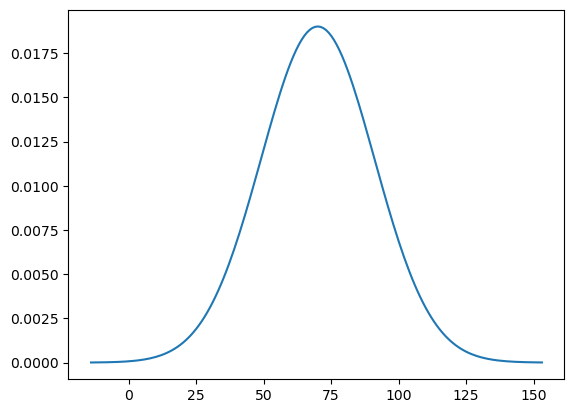

In [2301]:
lower_p=p_mean-4*p_std
upper_p=p_mean+4*p_std
Arr=np.arange(lower_p,upper_p)
plt.plot(Arr,norm.pdf(Arr,p_mean,p_std))

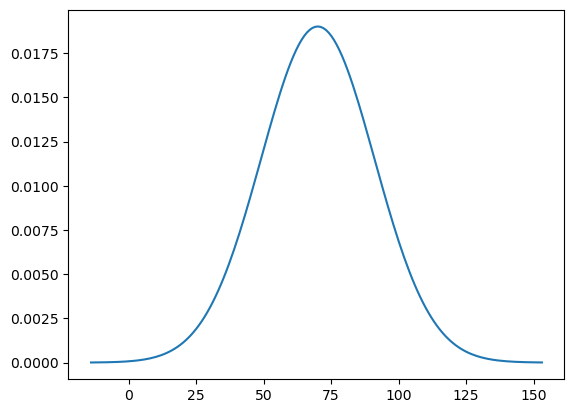

In [2302]:
sample_40=merged_data["minutes_played"].sample(n=40,replace=True,random_state=1)
s_mean=st.mean(merged_data["minutes_played"])
s_std=st.stdev(merged_data["minutes_played"])
lower_p1=s_mean-4*s_std
upper_p1=s_mean+4*s_std
Arr2=np.arange(lower_p1,upper_p1)
plt.plot(Arr2,norm.pdf(Arr2,s_mean,s_std))

Intrepretation:
- In this task, multiple random samples of minutes_played were taken, and their means were calculated. The standard deviation of these sample means (std_for_samp_data_mean) closely aligns with the expected theoretical standard deviation (p_std / sqrt(727)). The normal distribution plots of population and sample data further confirm that even with smaller sample sizes, the means follow a normal distribution, validating CLT.

# Sprint - 4


# Logistic Regression

1. Can we predict whether a player will receive a yellow card in a match based on their position, footedness, goals, assists, and minutes played?

In [2307]:
merged_data

,appearance_id,game_id_x,player_id,competition_id_x,yellow_cards,red_cards,goals,assists,minutes_played,season,...,country_of_birth,date_of_birth,sub_position,position_y,foot,height_in_cm,market_value_in_eur,highest_market_value_in_eur,contract_expiration_date,agent_name
0,2231426_49723,2231426,49723,L1,0,0,0,0,70,2012,...,Germany,1990-03-29,Right-Back,Defender,right,186.0,700000.0,5000000.0,2025-06-30,Wasserman
1,2231426_49723,2231426,49723,L1,0,0,0,0,70,2012,...,Germany,1990-03-29,Right-Back,Defender,right,186.0,700000.0,5000000.0,2025-06-30,Wasserman
2,2231426_49723,2231426,49723,L1,0,0,0,0,70,2012,...,Germany,1990-03-29,Right-Back,Defender,right,186.0,700000.0,5000000.0,2025-06-30,Wasserman
3,2231426_49723,2231426,49723,L1,0,0,0,0,70,2012,...,Germany,1990-03-29,Right-Back,Defender,right,186.0,700000.0,5000000.0,2025-06-30,Wasserman
4,2231426_49723,2231426,49723,L1,0,0,0,0,70,2012,...,Germany,1990-03-29,Right-Back,Defender,right,186.0,700000.0,5000000.0,2025-06-30,Wasserman
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3632,3415291_537467,3415291,537467,BE1,0,0,1,0,77,2020,...,United States,1996-08-29,Centre-Forward,Attack,right,176.0,300000.0,600000.0,2026-06-30,TOP Agency
3633,3415291_537467,3415291,537467,BE1,0,0,1,0,77,2020,...,United States,1996-08-29,Centre-Forward,Attack,right,176.0,300000.0,600000.0,2026-06-30,TOP Agency
3634,3415291_537467,3415291,537467,BE1,0,0,1,0,77,2020,...,United States,1996-08-29,Centre-Forward,Attack,right,176.0,300000.0,600000.0,2026-06-30,TOP Agency
3635,3415291_537467,3415291,537467,BE1,0,0,1,0,77,2020,...,United States,1996-08-29,Centre-Forward,Attack,right,176.0,300000.0,600000.0,2026-06-30,TOP Agency


In [2308]:
merged_data.columns

Index(['appearance_id', 'game_id_x', 'player_id', 'competition_id_x',
       'yellow_cards', 'red_cards', 'goals', 'assists', 'minutes_played',
       'season', 'round', 'home_club_goals', 'away_club_goals',
       'home_club_position', 'away_club_position', 'home_club_manager_name',
       'away_club_manager_name', 'stadium', 'attendance', 'referee',
       'home_club_name', 'away_club_name', 'aggregate', 'competition_type',
       'game_event_id', 'date', 'minute', 'type_x', 'description',
       'player_in_id', 'game_lineups_id', 'game_id_y', 'type_y', 'number',
       'team_captain', 'position_x', 'name', 'last_season', 'current_club_id',
       'player_code', 'country_of_birth', 'date_of_birth', 'sub_position',
       'position_y', 'foot', 'height_in_cm', 'market_value_in_eur',
       'highest_market_value_in_eur', 'contract_expiration_date',
       'agent_name'],
      dtype='object')

target column --> yellow cards

In [2310]:
feature_col = merged_data[['position_x','position_y','minutes_played','goals','assists','foot']]
feature_col

,position_x,position_y,minutes_played,goals,assists,foot
0,Right-Back,Defender,70,0,0,right
1,Right-Back,Defender,70,0,0,right
2,Right-Back,Defender,70,0,0,right
3,Right-Back,Defender,70,0,0,right
4,Right-Back,Defender,70,0,0,right
...,...,...,...,...,...,...
3632,Centre-Forward,Attack,77,1,0,right
3633,Centre-Forward,Attack,77,1,0,right
3634,Centre-Forward,Attack,77,1,0,right
3635,Centre-Forward,Attack,77,1,0,right


Intrepretion:
- i have taken these columns as a feature columns.

In [2312]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2313]:
label_encoder = preprocessing.LabelEncoder()
feature_col['position_x_c'] = label_encoder.fit_transform(feature_col['position_x'])
feature_col['position_y_c'] = label_encoder.fit_transform(feature_col['position_y'])
feature_col['foot_c'] = label_encoder.fit_transform(feature_col['foot'])

In [2314]:
feature_col

,position_x,position_y,minutes_played,goals,assists,foot,position_x_c,position_y_c,foot_c
0,Right-Back,Defender,70,0,0,right,9,1,2
1,Right-Back,Defender,70,0,0,right,9,1,2
2,Right-Back,Defender,70,0,0,right,9,1,2
3,Right-Back,Defender,70,0,0,right,9,1,2
4,Right-Back,Defender,70,0,0,right,9,1,2
...,...,...,...,...,...,...,...,...,...
3632,Centre-Forward,Attack,77,1,0,right,3,0,2
3633,Centre-Forward,Attack,77,1,0,right,3,0,2
3634,Centre-Forward,Attack,77,1,0,right,3,0,2
3635,Centre-Forward,Attack,77,1,0,right,3,0,2


intrepretation:
- i have encoded the categorical columns 
- label encoder is used to convert the categorical data into numerical data

In [2316]:
num_feature = feature_col.drop(columns = ['position_x','position_y','foot'], axis = 1)
num_feature

,minutes_played,goals,assists,position_x_c,position_y_c,foot_c
0,70,0,0,9,1,2
1,70,0,0,9,1,2
2,70,0,0,9,1,2
3,70,0,0,9,1,2
4,70,0,0,9,1,2
...,...,...,...,...,...,...
3632,77,1,0,3,0,2
3633,77,1,0,3,0,2
3634,77,1,0,3,0,2
3635,77,1,0,3,0,2


In [2317]:
yel_card = merged_data[['yellow_cards']]
yel_card

,yellow_cards
0,0
1,0
2,0
3,0
4,0
...,...
3632,0
3633,0
3634,0
3635,0


In [2318]:
cols = num_feature.columns 
scaler = StandardScaler()
df_scaled = scaler.fit_transform(num_feature)
df_scaled = pd.DataFrame(df_scaled,columns=cols)
df_scaled

,minutes_played,goals,assists,position_x_c,position_y_c,foot_c
0,-0.000445,-0.787909,-0.384674,1.158142,0.618899,0.431977
1,-0.000445,-0.787909,-0.384674,1.158142,0.618899,0.431977
2,-0.000445,-0.787909,-0.384674,1.158142,0.618899,0.431977
3,-0.000445,-0.787909,-0.384674,1.158142,0.618899,0.431977
4,-0.000445,-0.787909,-0.384674,1.158142,0.618899,0.431977
...,...,...,...,...,...,...
3632,0.333041,0.844925,-0.384674,-1.008236,-0.707522,0.431977
3633,0.333041,0.844925,-0.384674,-1.008236,-0.707522,0.431977
3634,0.333041,0.844925,-0.384674,-1.008236,-0.707522,0.431977
3635,0.333041,0.844925,-0.384674,-1.008236,-0.707522,0.431977


intrepretation:
- i have scaled the feature columns by using standard scaler .

In [2320]:
scaled_df = pd.concat([df_scaled,yel_card],axis = 1 )
scaled_df

,minutes_played,goals,assists,position_x_c,position_y_c,foot_c,yellow_cards
0,-0.000445,-0.787909,-0.384674,1.158142,0.618899,0.431977,0
1,-0.000445,-0.787909,-0.384674,1.158142,0.618899,0.431977,0
2,-0.000445,-0.787909,-0.384674,1.158142,0.618899,0.431977,0
3,-0.000445,-0.787909,-0.384674,1.158142,0.618899,0.431977,0
4,-0.000445,-0.787909,-0.384674,1.158142,0.618899,0.431977,0
...,...,...,...,...,...,...,...
3632,0.333041,0.844925,-0.384674,-1.008236,-0.707522,0.431977,0
3633,0.333041,0.844925,-0.384674,-1.008236,-0.707522,0.431977,0
3634,0.333041,0.844925,-0.384674,-1.008236,-0.707522,0.431977,0
3635,0.333041,0.844925,-0.384674,-1.008236,-0.707522,0.431977,0


In [2321]:
abs(scaled_df.corr())>= 0.7

,minutes_played,goals,assists,position_x_c,position_y_c,foot_c,yellow_cards
minutes_played,True,False,False,False,False,False,False
goals,False,True,False,False,False,False,False
assists,False,False,True,False,False,False,False
position_x_c,False,False,False,True,False,False,False
position_y_c,False,False,False,False,True,False,False
foot_c,False,False,False,False,False,True,False
yellow_cards,False,False,False,False,False,False,True


intrepretation:
- 0.7 is the maximum value for normal correlation beyond this is considered as a highly correlated. So, we have to remove the columns which are highly correlated.


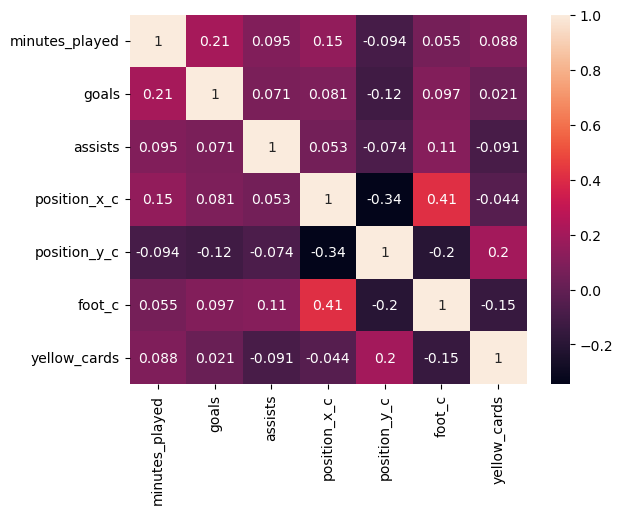

In [2323]:
sns.heatmap(scaled_df.corr(), annot = True)
plt.show()

intrepretation:
- in this none of the columns are highly correlated.

In [2325]:
#splitting the data
player_train,player_test = train_test_split(scaled_df,test_size = 0.2 , random_state = 100)
print(player_train.shape)
print(player_test.shape)

(2909, 7)
(728, 7)


In [2326]:
X_train = player_train.drop(columns = 'yellow_cards' , axis = 1)
y_train = player_train['yellow_cards']
X_test = player_test.drop(columns = 'yellow_cards' , axis = 1)
y_test = player_test['yellow_cards']
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2909, 6)
(2909,)
(728, 6)
(728,)


intrepretation:
- now x_train has 80% of data except the yellow cards column
- y_train has 80% of data only on yellow cards column
- now x_test has 20% of data except the yellow cards column
- y_test has 20% of data only on yellow cards column.


In [2328]:
logreg = LogisticRegression().fit(X_train,y_train)

y_pred = logreg.predict(X_test)
y_pred[0]

0

intepretation:
- Using the trained model to predict the outcome of the X_Test dataset


In [2330]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))
tn,fp,fn,tp = confusion_matrix(y_test,y_pred).ravel() 
print(tn,fp,fn,tp)

[[616   2]
 [106   4]]
616 2 106 4


intrepretation:
- The confusion matrix is a table that helps visulauze the performance of classification model.
- The function calculates the number of correctly and incorrectly classified instances for each class and returns the resulting confusion matrix.
- ravel()--> used to unpack the data.


In [2332]:
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

print("recall_score:",recall_score(y_test,y_pred))
print("f1_score:",f1_score(y_test,y_pred))
print("Accuracy Score:",accuracy_score(y_test,y_pred))
print("Precision Score:",precision_score(y_test,y_pred))

recall_score: 0.03636363636363636
f1_score: 0.06896551724137931
Accuracy Score: 0.8516483516483516
Precision Score: 0.6666666666666666


- Recall Score :The model correctly find only 3.63% of actual positive cases.
- Precision Score :When the model predicts positive, it is correct 66.67% of the time.
- F1 Score checks the balance between the recall and precisiion score, which is very low here.
- Accuracy Score is 85.16% which accurtely classify 85% of all cases.

In [2334]:
from sklearn.metrics import roc_auc_score  # roc --> receiver operation characteristics score
roc = roc_auc_score(y_test, logreg.predict_proba(X_test)[:,1])
print(roc)

0.717188879082083


- the roc score is 71.7% so, the model performs moderately.

In [2336]:
from sklearn import metrics
from sklearn.metrics import RocCurveDisplay

<Figure size 700x500 with 0 Axes>

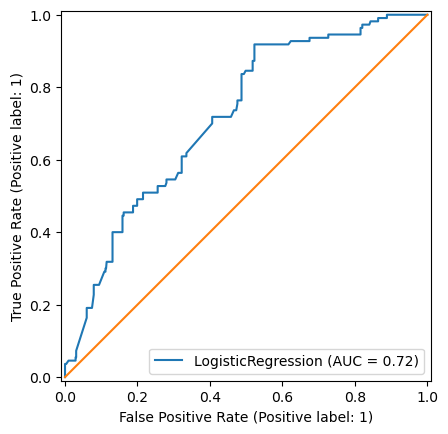

In [2337]:
plt.figure(figsize=(7,5))
RocCurveDisplay.from_estimator(logreg,X_test,y_test)
plt.plot([0,1],[0,1])
plt.show()

intrepretation:
- the blue line is closer to the orange line but not very closer comparing to the other side it  is closer.
- the auc score should be > 80% but in this case it is 72% so, the model performs moderately.

# Descriptive Analysis (Performance Analysis)

1.How does player height affect market value?

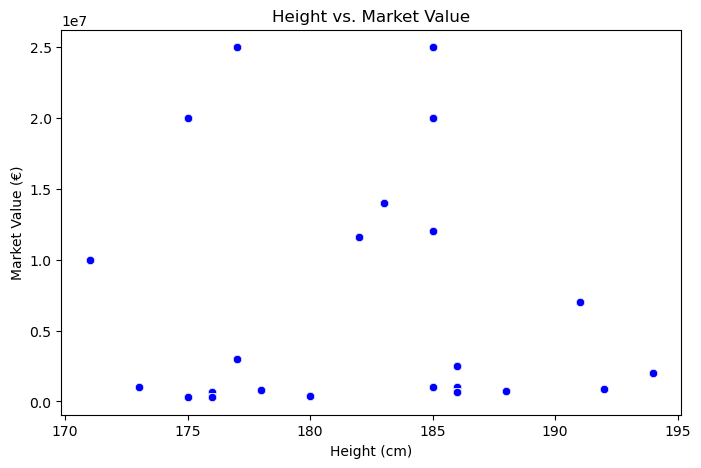

In [2341]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=merged_data, x='height_in_cm', y='market_value_in_eur', color='blue')
plt.xlabel("Height (cm)")
plt.ylabel("Market Value (€)")
plt.title("Height vs. Market Value")
plt.show()

intrepretation:
- by visualzing this we can see that there is no trend, so height is not correlated with the market value.

2.Which positions have the highest average market value?


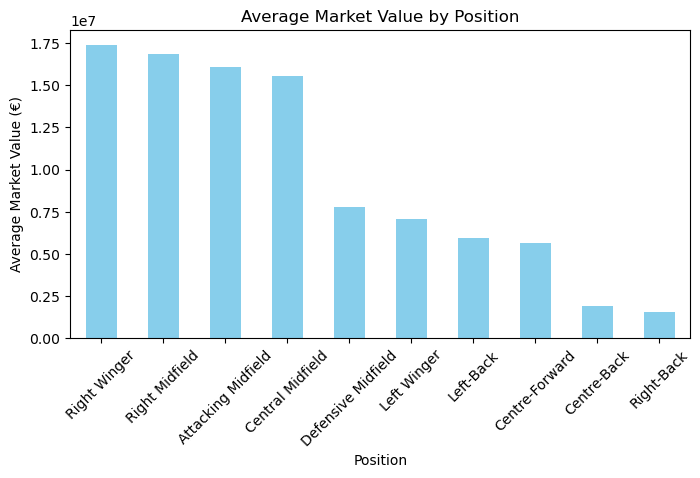

In [2344]:
avg_market_value = merged_data.groupby('position_x')['market_value_in_eur'].mean().sort_values(ascending=False)

plt.figure(figsize=(8, 4))
avg_market_value.plot(kind='bar', color='skyblue')
plt.xlabel("Position")
plt.ylabel("Average Market Value (€)")
plt.title("Average Market Value by Position")
plt.xticks(rotation=45)
plt.show()


intrepretation:
- we can see that the player who are in attacking position has got the more average market value comparing to the defensive position players.

3.What is the trend of player market value with age?


In [2347]:
from datetime import datetime
merged_data['date_of_birth'] = pd.to_datetime(merged_data['date_of_birth'])
today = datetime.today().year
merged_data['age'] = today - merged_data['date_of_birth'].dt.year


In [2348]:
merged_data

,appearance_id,game_id_x,player_id,competition_id_x,yellow_cards,red_cards,goals,assists,minutes_played,season,...,date_of_birth,sub_position,position_y,foot,height_in_cm,market_value_in_eur,highest_market_value_in_eur,contract_expiration_date,agent_name,age
0,2231426_49723,2231426,49723,L1,0,0,0,0,70,2012,...,1990-03-29,Right-Back,Defender,right,186.0,700000.0,5000000.0,2025-06-30,Wasserman,35
1,2231426_49723,2231426,49723,L1,0,0,0,0,70,2012,...,1990-03-29,Right-Back,Defender,right,186.0,700000.0,5000000.0,2025-06-30,Wasserman,35
2,2231426_49723,2231426,49723,L1,0,0,0,0,70,2012,...,1990-03-29,Right-Back,Defender,right,186.0,700000.0,5000000.0,2025-06-30,Wasserman,35
3,2231426_49723,2231426,49723,L1,0,0,0,0,70,2012,...,1990-03-29,Right-Back,Defender,right,186.0,700000.0,5000000.0,2025-06-30,Wasserman,35
4,2231426_49723,2231426,49723,L1,0,0,0,0,70,2012,...,1990-03-29,Right-Back,Defender,right,186.0,700000.0,5000000.0,2025-06-30,Wasserman,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3632,3415291_537467,3415291,537467,BE1,0,0,1,0,77,2020,...,1996-08-29,Centre-Forward,Attack,right,176.0,300000.0,600000.0,2026-06-30,TOP Agency,29
3633,3415291_537467,3415291,537467,BE1,0,0,1,0,77,2020,...,1996-08-29,Centre-Forward,Attack,right,176.0,300000.0,600000.0,2026-06-30,TOP Agency,29
3634,3415291_537467,3415291,537467,BE1,0,0,1,0,77,2020,...,1996-08-29,Centre-Forward,Attack,right,176.0,300000.0,600000.0,2026-06-30,TOP Agency,29
3635,3415291_537467,3415291,537467,BE1,0,0,1,0,77,2020,...,1996-08-29,Centre-Forward,Attack,right,176.0,300000.0,600000.0,2026-06-30,TOP Agency,29


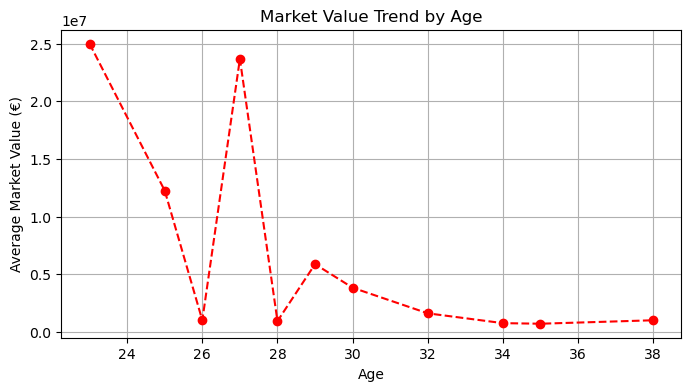

In [2349]:
age_trend = merged_data.groupby('age')['market_value_in_eur'].mean()

plt.figure(figsize=(8, 4))
plt.plot(age_trend.index, age_trend.values, marker='o', linestyle='--', color='red')
plt.xlabel("Age")
plt.ylabel("Average Market Value (€)")
plt.title("Market Value Trend by Age")
plt.grid(True)
plt.show()


intrepretation:
- by visualing we can see that the players has more market value in the 20's it has some flexuations but after 30 the market value is dropping.

# Linear & Multi linear Regression

1. A football scouting agency wants to develop a predictive model to estimate the market value (€) of professional football players based on their on-field performance and positional attributes. You have been provided with a dataset containing several key performance indicators (KPIs) for players, including their goal-scoring ability, passing accuracy, defensive contributions, and positional play.

In [2353]:
merged_data.columns

Index(['appearance_id', 'game_id_x', 'player_id', 'competition_id_x',
       'yellow_cards', 'red_cards', 'goals', 'assists', 'minutes_played',
       'season', 'round', 'home_club_goals', 'away_club_goals',
       'home_club_position', 'away_club_position', 'home_club_manager_name',
       'away_club_manager_name', 'stadium', 'attendance', 'referee',
       'home_club_name', 'away_club_name', 'aggregate', 'competition_type',
       'game_event_id', 'date', 'minute', 'type_x', 'description',
       'player_in_id', 'game_lineups_id', 'game_id_y', 'type_y', 'number',
       'team_captain', 'position_x', 'name', 'last_season', 'current_club_id',
       'player_code', 'country_of_birth', 'date_of_birth', 'sub_position',
       'position_y', 'foot', 'height_in_cm', 'market_value_in_eur',
       'highest_market_value_in_eur', 'contract_expiration_date', 'agent_name',
       'age'],
      dtype='object')

In [2354]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3637 entries, 0 to 3636
Data columns (total 51 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   appearance_id                3637 non-null   object        
 1   game_id_x                    3637 non-null   int64         
 2   player_id                    3637 non-null   int64         
 3   competition_id_x             3637 non-null   object        
 4   yellow_cards                 3637 non-null   int64         
 5   red_cards                    3637 non-null   int64         
 6   goals                        3637 non-null   int64         
 7   assists                      3637 non-null   int64         
 8   minutes_played               3637 non-null   int64         
 9   season                       3637 non-null   int64         
 10  round                        3637 non-null   object        
 11  home_club_goals              3637 non-null 

In [2355]:
test_df = pd.read_excel("test data.xlsx")
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 49 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Unnamed: 0                   2 non-null      int64         
 1   appearance_id                2 non-null      object        
 2   game_id                      2 non-null      int64         
 3   player_id                    2 non-null      int64         
 4   competition_id               2 non-null      object        
 5   yellow_cards                 2 non-null      int64         
 6   red_cards                    2 non-null      int64         
 7   goals                        2 non-null      int64         
 8   assists                      2 non-null      int64         
 9   minutes_played               2 non-null      int64         
 10  season                       2 non-null      int64         
 11  round                        2 non-null      obje

In [2356]:
test_df = test_df.drop(columns = ['Unnamed: 0'] , axis = 1) #--> now 48 columns left
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 48 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   appearance_id                2 non-null      object        
 1   game_id                      2 non-null      int64         
 2   player_id                    2 non-null      int64         
 3   competition_id               2 non-null      object        
 4   yellow_cards                 2 non-null      int64         
 5   red_cards                    2 non-null      int64         
 6   goals                        2 non-null      int64         
 7   assists                      2 non-null      int64         
 8   minutes_played               2 non-null      int64         
 9   season                       2 non-null      int64         
 10  round                        2 non-null      object        
 11  home_club_goals              2 non-null      int6

In [2357]:
merged_data = merged_data.drop(columns = ['agent_name','description','age'],axis=1)
merged_data

,appearance_id,game_id_x,player_id,competition_id_x,yellow_cards,red_cards,goals,assists,minutes_played,season,...,player_code,country_of_birth,date_of_birth,sub_position,position_y,foot,height_in_cm,market_value_in_eur,highest_market_value_in_eur,contract_expiration_date
0,2231426_49723,2231426,49723,L1,0,0,0,0,70,2012,...,timothy-chandler,Germany,1990-03-29,Right-Back,Defender,right,186.0,700000.0,5000000.0,2025-06-30
1,2231426_49723,2231426,49723,L1,0,0,0,0,70,2012,...,timothy-chandler,Germany,1990-03-29,Right-Back,Defender,right,186.0,700000.0,5000000.0,2025-06-30
2,2231426_49723,2231426,49723,L1,0,0,0,0,70,2012,...,timothy-chandler,Germany,1990-03-29,Right-Back,Defender,right,186.0,700000.0,5000000.0,2025-06-30
3,2231426_49723,2231426,49723,L1,0,0,0,0,70,2012,...,timothy-chandler,Germany,1990-03-29,Right-Back,Defender,right,186.0,700000.0,5000000.0,2025-06-30
4,2231426_49723,2231426,49723,L1,0,0,0,0,70,2012,...,timothy-chandler,Germany,1990-03-29,Right-Back,Defender,right,186.0,700000.0,5000000.0,2025-06-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3632,3415291_537467,3415291,537467,BE1,0,0,1,0,77,2020,...,joseph-efford,United States,1996-08-29,Centre-Forward,Attack,right,176.0,300000.0,600000.0,2026-06-30
3633,3415291_537467,3415291,537467,BE1,0,0,1,0,77,2020,...,joseph-efford,United States,1996-08-29,Centre-Forward,Attack,right,176.0,300000.0,600000.0,2026-06-30
3634,3415291_537467,3415291,537467,BE1,0,0,1,0,77,2020,...,joseph-efford,United States,1996-08-29,Centre-Forward,Attack,right,176.0,300000.0,600000.0,2026-06-30
3635,3415291_537467,3415291,537467,BE1,0,0,1,0,77,2020,...,joseph-efford,United States,1996-08-29,Centre-Forward,Attack,right,176.0,300000.0,600000.0,2026-06-30


In [2358]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3637 entries, 0 to 3636
Data columns (total 48 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   appearance_id                3637 non-null   object        
 1   game_id_x                    3637 non-null   int64         
 2   player_id                    3637 non-null   int64         
 3   competition_id_x             3637 non-null   object        
 4   yellow_cards                 3637 non-null   int64         
 5   red_cards                    3637 non-null   int64         
 6   goals                        3637 non-null   int64         
 7   assists                      3637 non-null   int64         
 8   minutes_played               3637 non-null   int64         
 9   season                       3637 non-null   int64         
 10  round                        3637 non-null   object        
 11  home_club_goals              3637 non-null 

In [2359]:
# now im taking the needed columns from the both dataframe.
to_merge_m = merged_data[['foot','goals','assists','height_in_cm','minutes_played','yellow_cards','position_x','position_y','highest_market_value_in_eur','market_value_in_eur']]
to_merge_m

,foot,goals,assists,height_in_cm,minutes_played,yellow_cards,position_x,position_y,highest_market_value_in_eur,market_value_in_eur
0,right,0,0,186.0,70,0,Right-Back,Defender,5000000.0,700000.0
1,right,0,0,186.0,70,0,Right-Back,Defender,5000000.0,700000.0
2,right,0,0,186.0,70,0,Right-Back,Defender,5000000.0,700000.0
3,right,0,0,186.0,70,0,Right-Back,Defender,5000000.0,700000.0
4,right,0,0,186.0,70,0,Right-Back,Defender,5000000.0,700000.0
...,...,...,...,...,...,...,...,...,...,...
3632,right,1,0,176.0,77,0,Centre-Forward,Attack,600000.0,300000.0
3633,right,1,0,176.0,77,0,Centre-Forward,Attack,600000.0,300000.0
3634,right,1,0,176.0,77,0,Centre-Forward,Attack,600000.0,300000.0
3635,right,1,0,176.0,77,0,Centre-Forward,Attack,600000.0,300000.0


In [2360]:
to_merge_t = test_df[['foot','goals','assists','height_in_cm','minutes_played','yellow_cards','position_x','position_y','highest_market_value_in_eur','market_value_in_eur']]
to_merge_t

,foot,goals,assists,height_in_cm,minutes_played,yellow_cards,position_x,position_y,highest_market_value_in_eur,market_value_in_eur
0,right,0,0,177,58,0,Midfield,Right Midfield,3000000,3000000
1,right,0,0,177,58,0,Midfield,Central Midfield,3000000,3000000


In [2361]:
con_merged_data = pd.concat([to_merge_m,to_merge_t] , axis = 0,ignore_index = True)
con_merged_data

,foot,goals,assists,height_in_cm,minutes_played,yellow_cards,position_x,position_y,highest_market_value_in_eur,market_value_in_eur
0,right,0,0,186.0,70,0,Right-Back,Defender,5000000.0,700000.0
1,right,0,0,186.0,70,0,Right-Back,Defender,5000000.0,700000.0
2,right,0,0,186.0,70,0,Right-Back,Defender,5000000.0,700000.0
3,right,0,0,186.0,70,0,Right-Back,Defender,5000000.0,700000.0
4,right,0,0,186.0,70,0,Right-Back,Defender,5000000.0,700000.0
...,...,...,...,...,...,...,...,...,...,...
3634,right,1,0,176.0,77,0,Centre-Forward,Attack,600000.0,300000.0
3635,right,1,0,176.0,77,0,Centre-Forward,Attack,600000.0,300000.0
3636,right,1,0,176.0,77,0,Centre-Forward,Attack,600000.0,300000.0
3637,right,0,0,177.0,58,0,Midfield,Right Midfield,3000000.0,3000000.0


intrepretation:
- i concated the merged_data and test_df by tooking only the required columns from both dataframe.

In [2363]:
label_encoder = preprocessing.LabelEncoder()
con_merged_data['foot_c'] = label_encoder.fit_transform(con_merged_data['foot'])
con_merged_data['position_x_c'] = label_encoder.fit_transform(con_merged_data['position_x'])
con_merged_data['position_y_c'] = label_encoder.fit_transform(con_merged_data['position_y'])
con_merged_data



,foot,goals,assists,height_in_cm,minutes_played,yellow_cards,position_x,position_y,highest_market_value_in_eur,market_value_in_eur,foot_c,position_x_c,position_y_c
0,right,0,0,186.0,70,0,Right-Back,Defender,5000000.0,700000.0,2,10,2
1,right,0,0,186.0,70,0,Right-Back,Defender,5000000.0,700000.0,2,10,2
2,right,0,0,186.0,70,0,Right-Back,Defender,5000000.0,700000.0,2,10,2
3,right,0,0,186.0,70,0,Right-Back,Defender,5000000.0,700000.0,2,10,2
4,right,0,0,186.0,70,0,Right-Back,Defender,5000000.0,700000.0,2,10,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3634,right,1,0,176.0,77,0,Centre-Forward,Attack,600000.0,300000.0,2,3,0
3635,right,1,0,176.0,77,0,Centre-Forward,Attack,600000.0,300000.0,2,3,0
3636,right,1,0,176.0,77,0,Centre-Forward,Attack,600000.0,300000.0,2,3,0
3637,right,0,0,177.0,58,0,Midfield,Right Midfield,3000000.0,3000000.0,2,7,4


intrepretation:
- the columns which are in categorical are encoded here, it changes the cateegorical column as a numerical column.

In [2365]:
yellow_cards = con_merged_data[['yellow_cards']]
yellow_cards

,yellow_cards
0,0
1,0
2,0
3,0
4,0
...,...
3634,0
3635,0
3636,0
3637,0


- im separating this column because the values are in 0 and 1 so, we dont have to scale that value.

In [2367]:
con_merged_data = con_merged_data.drop(columns = ['yellow_cards','foot','position_x','position_y'] , axis = 1)

- im dropping the column which are in categorical which is already encoded.

In [2369]:
con_merged_data1= con_merged_data.iloc[:-2]
con_merged_data1

,goals,assists,height_in_cm,minutes_played,highest_market_value_in_eur,market_value_in_eur,foot_c,position_x_c,position_y_c
0,0,0,186.0,70,5000000.0,700000.0,2,10,2
1,0,0,186.0,70,5000000.0,700000.0,2,10,2
2,0,0,186.0,70,5000000.0,700000.0,2,10,2
3,0,0,186.0,70,5000000.0,700000.0,2,10,2
4,0,0,186.0,70,5000000.0,700000.0,2,10,2
...,...,...,...,...,...,...,...,...,...
3632,1,0,176.0,77,600000.0,300000.0,2,3,0
3633,1,0,176.0,77,600000.0,300000.0,2,3,0
3634,1,0,176.0,77,600000.0,300000.0,2,3,0
3635,1,0,176.0,77,600000.0,300000.0,2,3,0


intrepretation:
- now im dropping the test data from the merged data becoz we are going to train the data while training the we dont need the test data.

In [2371]:
cols = con_merged_data1.columns
scaler = preprocessing.StandardScaler()
df_scaled = scaler.fit_transform(con_merged_data1)
df_scaled = pd.DataFrame(df_scaled , columns = cols)
df_scaled

,goals,assists,height_in_cm,minutes_played,highest_market_value_in_eur,market_value_in_eur,foot_c,position_x_c,position_y_c
0,-0.787909,-0.384674,0.679979,-0.000445,-0.837579,-1.004958,0.431977,1.126672,0.901251
1,-0.787909,-0.384674,0.679979,-0.000445,-0.837579,-1.004958,0.431977,1.126672,0.901251
2,-0.787909,-0.384674,0.679979,-0.000445,-0.837579,-1.004958,0.431977,1.126672,0.901251
3,-0.787909,-0.384674,0.679979,-0.000445,-0.837579,-1.004958,0.431977,1.126672,0.901251
4,-0.787909,-0.384674,0.679979,-0.000445,-0.837579,-1.004958,0.431977,1.126672,0.901251
...,...,...,...,...,...,...,...,...,...
3632,0.844925,-0.384674,-0.882692,0.333041,-1.018406,-1.041870,0.431977,-1.042246,-0.747982
3633,0.844925,-0.384674,-0.882692,0.333041,-1.018406,-1.041870,0.431977,-1.042246,-0.747982
3634,0.844925,-0.384674,-0.882692,0.333041,-1.018406,-1.041870,0.431977,-1.042246,-0.747982
3635,0.844925,-0.384674,-0.882692,0.333041,-1.018406,-1.041870,0.431977,-1.042246,-0.747982


- done scaling for the data

In [2373]:
yellow_cards=yellow_cards.iloc[:-2]
yellow_cards

,yellow_cards
0,0
1,0
2,0
3,0
4,0
...,...
3632,0
3633,0
3634,0
3635,0


- removing the test data from the yellow card column 

In [2375]:
df_scaled = pd.concat([df_scaled,yellow_cards],axis = 1)
df_scaled.isnull().sum()

goals                          0
assists                        0
height_in_cm                   0
minutes_played                 0
highest_market_value_in_eur    0
market_value_in_eur            0
foot_c                         0
position_x_c                   0
position_y_c                   0
yellow_cards                   0
dtype: int64

- after removing the test data from the data, done scaling and concated the yellow card column after scaling.

In [2377]:
abs(df_scaled.corr())>=0.7

,goals,assists,height_in_cm,minutes_played,highest_market_value_in_eur,market_value_in_eur,foot_c,position_x_c,position_y_c,yellow_cards
goals,True,False,False,False,False,False,False,False,False,False
assists,False,True,False,False,False,False,False,False,False,False
height_in_cm,False,False,True,False,False,False,False,False,False,False
minutes_played,False,False,False,True,False,False,False,False,False,False
highest_market_value_in_eur,False,False,False,False,True,True,False,False,False,False
market_value_in_eur,False,False,False,False,True,True,False,False,False,False
foot_c,False,False,False,False,False,False,True,False,False,False
position_x_c,False,False,False,False,False,False,False,True,False,False
position_y_c,False,False,False,False,False,False,False,False,True,False
yellow_cards,False,False,False,False,False,False,False,False,False,True


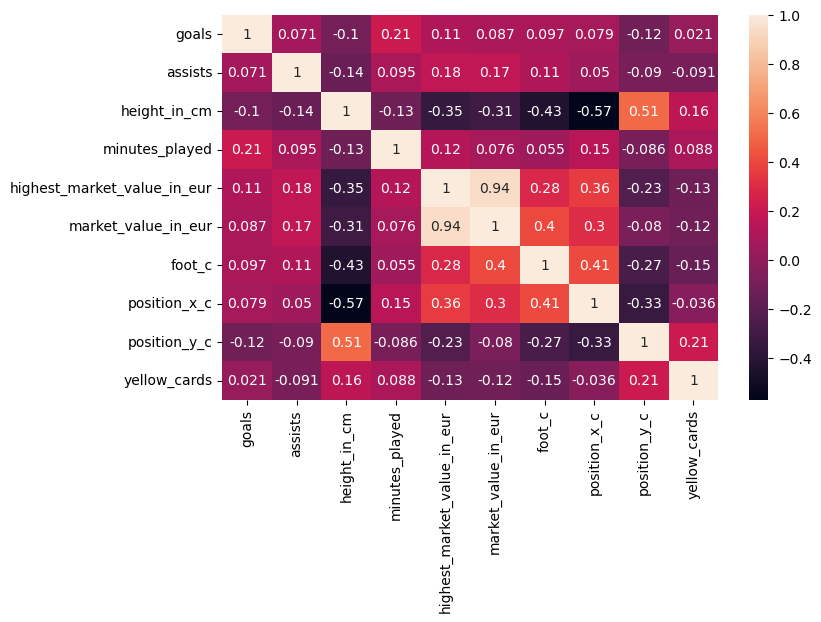

In [2378]:
sns.heatmap(df_scaled.corr() , annot = True)
plt.gcf().set_size_inches(8,5)
plt.show()

- plotting the heatmap for finding the value which >= 0.7 by visualizing , in this case there is no value >=0.7 .so, dont have to drop columns.

In [2380]:
df_scaled.corr()[['market_value_in_eur']].sort_values(['market_value_in_eur'],ascending = False)

,market_value_in_eur
market_value_in_eur,1.000000
highest_market_value_in_eur,0.940143
foot_c,0.402838
position_x_c,0.304462
assists,0.173088
goals,0.086918
minutes_played,0.075691
position_y_c,-0.079692
yellow_cards,-0.122324
height_in_cm,-0.311942


- sorting the values based on the target column(market value) by the correlation of feature columns

In [2382]:
X1=np.array(df_scaled[['highest_market_value_in_eur']]).reshape(-1,1)
y1=np.array(df_scaled['market_value_in_eur'])

In [2383]:
from sklearn.linear_model import LinearRegression
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1, test_size = 0.3, random_state = 200)
mult_model_1 = LinearRegression().fit(X1_train, y1_train)
y1_pred=mult_model_1.predict(X1_test)
print('y1_pred:',y1_pred[0])

y1_pred: -0.00913530778580043


In [2384]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
MSE=mean_squared_error(y1_test,y1_pred)
print("MSE",MSE)
MAE=mean_absolute_error(y1_test,y1_pred)
print("MAE",MAE)
RMSE=mean_squared_error(y1_test,y1_pred,squared=False)
print("RMSE",RMSE)
r2_score=r2_score(y1_test,y1_pred)
print("R2_Score",r2_score)

MSE 0.10971555380641348
MAE 0.24178862319878147
RMSE 0.3312333826872127
R2_Score 0.8890180836588812


intrepretation:
- here the r2_score is very low which is 15.6% So, it is  a poor model.

In [2386]:
X2=np.array(df_scaled[['foot_c','position_x_c']]).reshape(-1,2)
y2=np.array(df_scaled['market_value_in_eur'])

In [2387]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y2, test_size = 0.3, random_state = 200)
mult_model_2 = LinearRegression().fit(X2_train, y2_train)
y2_pred=mult_model_2.predict(X2_test)
print('y2_pred:',y2_pred[0])


y2_pred: 0.2390130355546704


In [2388]:
from sklearn.metrics import r2_score
MSE=mean_squared_error(y2_test,y2_pred)
print("MSE:",MSE)
MAE=mean_absolute_error(y2_test,y2_pred)
print("MAE:",MAE)
RMSE=mean_squared_error(y2_test,y2_pred,squared=False)
print("RMSE:",RMSE)
r2_scoore = r2_score(y2_test,y2_pred)
print("r2_scores:",r2_scoore)

MSE: 0.8120118606294515
MAE: 0.7906048426517215
RMSE: 0.9011170071802282
r2_scores: 0.17861570891413558


intrepretation:
- here the r2_score is very low which is 17.8% , the r2_score should be more than 50% to accept , below 50%  is  a poor model.

In [2390]:
X3=np.array(df_scaled[['foot_c','position_x_c','assists']]).reshape(-1,3)
y3=np.array(df_scaled['market_value_in_eur'])

In [2391]:
X3_train, X3_test, y3_train, y3_test = train_test_split(X3,y3, test_size = 0.3, random_state = 200)
mult_model_3 = LinearRegression().fit(X3_train, y3_train)
y3_pred=mult_model_3.predict(X3_test)
print('y3_pred:',y3_pred[0])

y3_pred: 0.18323614949290112


In [2392]:
from sklearn.metrics import r2_score
MSE=mean_squared_error(y3_test,y3_pred)
print("MSE",MSE)
MAE=mean_absolute_error(y3_test,y3_pred)
print("MAE",MAE)
RMSE=mean_squared_error(y3_test,y3_pred,squared=False)
print("RMSE",RMSE)
r2_scoore=r2_score(y3_test,y3_pred)
print("R2_Score",r2_scoore)

MSE 0.7928461362613453
MAE 0.7805182232143855
RMSE 0.8904190790079384
R2_Score 0.19800264854706273


interpretation:
- here the r2_score is very low which is 19.8%.

In [2410]:
X4=np.array(df_scaled[['highest_market_value_in_eur','foot_c','position_x_c','assists','goals','minutes_played','position_y_c','yellow_cards']]).reshape(-1,8)
y4=np.array(df_scaled['market_value_in_eur'])

In [2412]:
X4_train, X4_test, y4_train, y4_test = train_test_split(X4,y4, test_size = 0.3, random_state = 200)
mult_model_4 = LinearRegression().fit(X4_train, y4_train)
y4_pred=mult_model_4.predict(X4_test)
print('y4_pred:',y4_pred[0])

y4_pred: 0.370652120273954


In [2414]:
from sklearn.metrics import r2_score

MSE=mean_squared_error(y4_test,y4_pred)
print("MSE",MSE)
MAE=mean_absolute_error(y4_test,y4_pred)
print("MAE",MAE)
RMSE=mean_squared_error(y4_test,y4_pred,squared=False)
print("RMSE",RMSE)
r2_scoore=r2_score(y4_test,y4_pred)
print("R2_Score",r2_scoore)

MSE 0.059030985399061875
MAE 0.17598299977626505
RMSE 0.24296293009235354
R2_Score 0.940287665186907


intrepretation:
- here the r2_score is very low which is 21.4% .It is a poor model.

In [2416]:
def calculating_residuals(model,features,label):
    Predictions=model.predict(features)
    df_results=pd.DataFrame({"Actual":label,"Predictions":Predictions})
    df_results["Residuals"]=abs(df_results["Actual"])-abs(df_results["Predictions"])
    return df_results
def Linear_assumption(model,feature,label):
    df_results=calculating_residuals(model,feature,label)
    sns.lmplot(x="Actual",y="Predictions",data=df_results,fit_reg=False)
    line_cords=np.arange(df_results.min().min(),df_results.max().max())
    plt.plot(line_cords,line_cords,color="red",linestyle="--")
    plt.title("Linear Regression plot")

interpretation:
- here, im calculating the residuals  by subracting the actual value with predictions value and stored in a dataframe. 

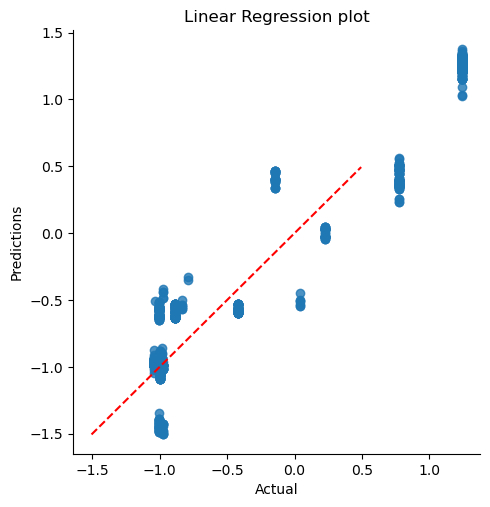

In [2419]:
Linear_assumption(mult_model_4,X4_test,y4_test)

intrepretation:
- in this visual the blue dots are away from the residual


In [2421]:
def homoscadecity_assumption(model,feature,label):
    df_results=calculating_residuals(model,feature,label)
    plt.figure(figsize=(7,5))
    plt.scatter(x=df_results.index,y=df_results.Residuals,alpha=0.5)
    plt.plot(np.repeat(0,df_results.index.max()),color="red",linestyle="--")
    plt.title("Linear_ Assumption Plot")
    plt.xlabel("Index value")
    plt.ylabel("Residual value")
    plt.show()

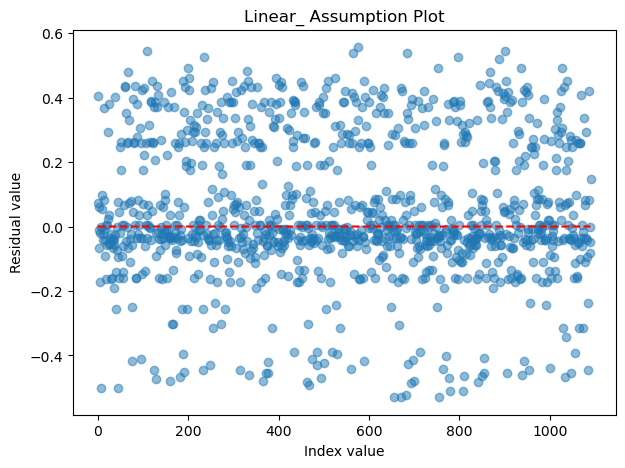

In [2423]:
homoscadecity_assumption(mult_model_4,X4_test,y4_test)

interpretation:
- in this visual we can see that most of the dots are present near around the actual line in the plot so, it is a good model.

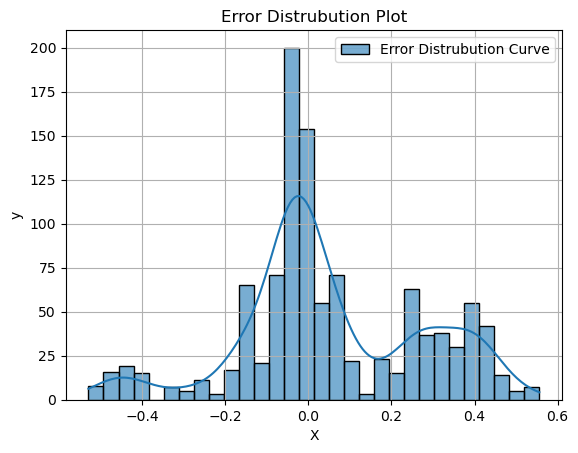

In [2460]:
df_results=calculating_residuals(mult_model_4,X4_test,y4_test)
sns.histplot(df_results.Residuals,bins=30,label="Error Distrubution Curve",alpha=0.6,kde=True)
plt.title("Error Distrubution Plot")
plt.xlabel("X")
plt.ylabel("y")
plt.grid()
plt.legend()
plt.show()

interpretation:
- The error distribution plot shows a non-normal, skewed distribution, indicating potential outliers or bias in predictions. 
The peaks suggest concentrated errors around zero, but the spread hints at variance that could affect model reliabilit.


# Sprint - 6

# Descriptive Analysis (Team Performance Analysis)

1) Which football clubs have the highest average home match attendance?

In [2462]:
team_attendance = merged_data.groupby("home_club_name")["attendance"].mean().reset_index()

In [2464]:
top_teams = team_attendance.sort_values(by="attendance", ascending=False).head(10)

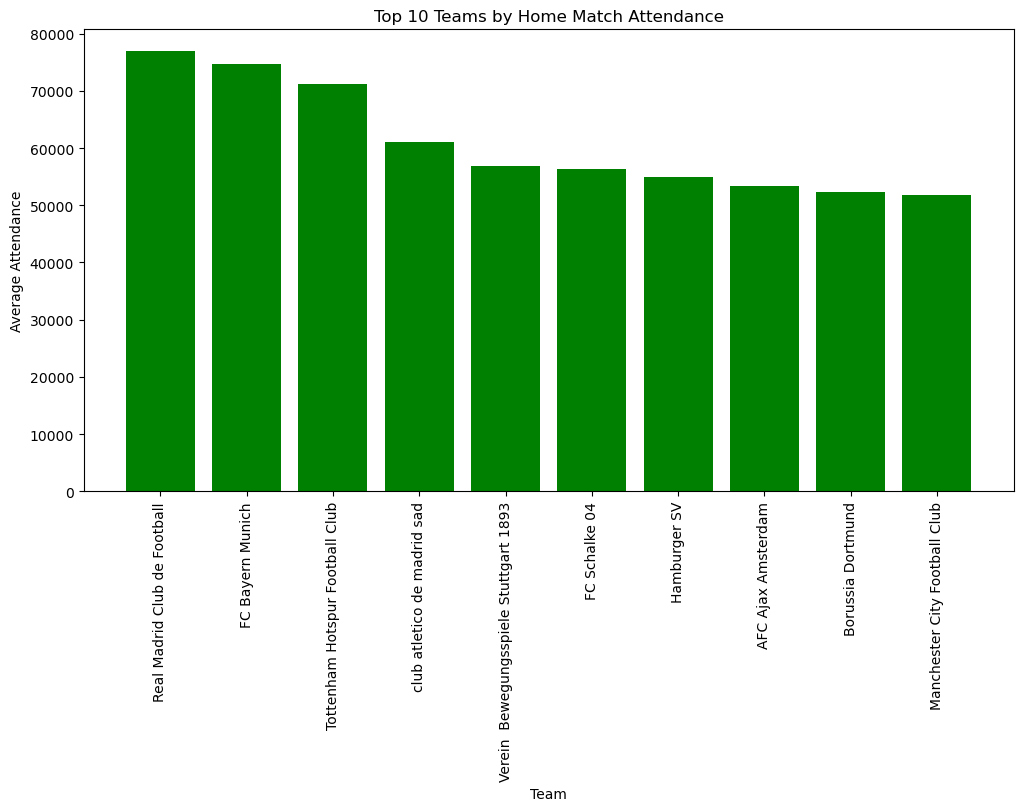

In [2466]:
plt.figure(figsize=(12, 6))
plt.bar(top_teams["home_club_name"], top_teams["attendance"], color="green")
plt.xticks(rotation=90)
plt.xlabel("Team")
plt.ylabel("Average Attendance")
plt.title("Top 10 Teams by Home Match Attendance")
plt.show()

2)Which team has played the most home matches?

In [2468]:
home_matches = merged_data["home_club_name"].value_counts().head(10)

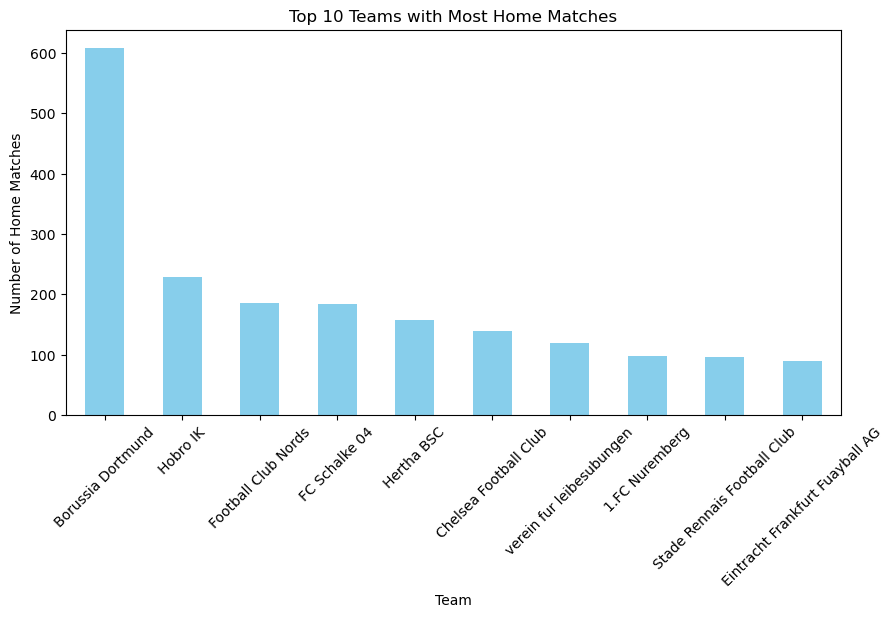

In [2470]:
plt.figure(figsize=(10, 5))
home_matches.plot(kind="bar", color="skyblue")
plt.xlabel("Team")
plt.ylabel("Number of Home Matches")
plt.title("Top 10 Teams with Most Home Matches")
plt.xticks(rotation=45)
plt.show()               

# Hypothesis testing

1) Is there a significant difference between the  number of goals scored by home teams and away teams?


HYPOTHESIS:
- H0: There is no significant difference between the number of goals scored by home teams and away teams
- H1: There is significant difference between the Number of goals score by home teams and away teams

In [2477]:
hypothesis_data1=merged_data[["home_club_goals"]]
hypothesis_data1

,home_club_goals
0,1
1,1
2,1
3,1
4,1
...,...
3632,3
3633,3
3634,3
3635,3


In [2478]:
sample_data1 = hypothesis_data1.sample(n=35,replace=True,random_state=1,ignore_index = True)
sample_data1

,home_club_goals
0,2
1,1
2,6
3,0
4,2
5,2
6,0
7,3
8,1
9,2


In [2479]:
p1_mean=st.mean(hypothesis_data1["home_club_goals"])
p1_std=st.stdev(hypothesis_data1["home_club_goals"])
p1_variance=st.variance(hypothesis_data1["home_club_goals"])
s1_mean=st.mean(sample_data1['home_club_goals'])
s1_std=st.stdev(sample_data1['home_club_goals'])
s1_variance=st.variance(sample_data1["home_club_goals"])

In [2480]:
hypothesis_data2 = merged_data[["away_club_goals"]]
hypothesis_data2

,away_club_goals
0,2
1,2
2,2
3,2
4,2
...,...
3632,2
3633,2
3634,2
3635,2


In [2484]:
sample_data2=hypothesis_data2.sample(n=35,replace=True,random_state=1,ignore_index = True)
sample_data2

,away_club_goals
0,1
1,0
2,0
3,1
4,4
5,0
6,3
7,2
8,1
9,4


In [2486]:
p2_mean = st.mean(hypothesis_data2["away_club_goals"])
p2_std = st.stdev(hypothesis_data2["away_club_goals"])
p2_variance = st.variance(hypothesis_data2["away_club_goals"])
s2_mean = st.mean(hypothesis_data2["away_club_goals"])
s2_std = st.stdev(hypothesis_data2["away_club_goals"])
s2_variance = st.variance(hypothesis_data2["away_club_goals"])
n1 = len(sample_data1)
n2 = len(sample_data2)
dof = n1+n2-2

In [2487]:
x1=s1_mean
x2=s2_mean
v1=s1_variance
v2=s2_variance
p1=p1_mean
p2=p2_mean
alpha=0.5

In [2489]:
signal=abs(x1-x2)
noise=m.sqrt((v1*(n1-1+(v2*(n2-2)))*((1/n1+1/n2))))

In [2492]:
t_statistics = signal/noise
t_statistics

0.02580488608723269

In [2493]:
p_value=t.sf(abs(t_statistics),dof)
p_value

0.48974427201605575

In [2495]:
t_critical=norm.ppf(alpha/2,dof)
t_critical

67.32551024980391

- --> Alpha value is Greater than p_value so, we have to reject the null hypothesis.

# Sprint - 7

# Attendance and Stadium Annalysis

1)Which stadium has hosted the most matches?

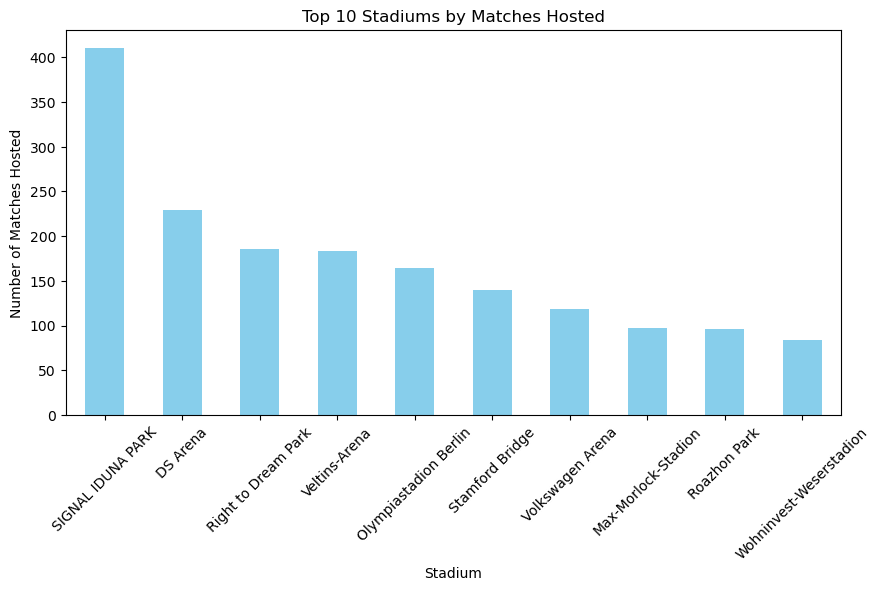

In [2503]:
stadium_counts = merged_data["stadium"].value_counts().head(10)
plt.figure(figsize=(10, 5))
stadium_counts.plot(kind="bar", color="skyblue")
plt.xlabel("Stadium")
plt.ylabel("Number of Matches Hosted")
plt.title("Top 10 Stadiums by Matches Hosted")
plt.xticks(rotation=45)
plt.show()

2) What is the attendance distribution across different stadiums

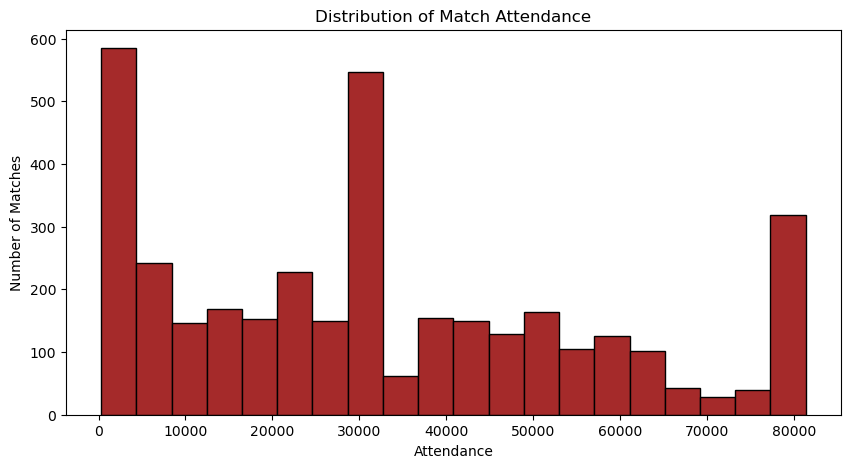

In [2505]:
plt.figure(figsize=(10, 5))
plt.hist(merged_data["attendance"], bins=20, color="brown", edgecolor="black")
plt.xlabel("Attendance")
plt.ylabel("Number of Matches")
plt.title("Distribution of Match Attendance")
plt.show()

# K-Nearest Neighbour Classification

Can we predict whether player will receive an yellow card based on the match characterstics and other significant factor

In [2508]:
test_data1=test_df.copy()
knn_1=merged_data.copy()
test_data_knn=knn_1[["goals","minutes_played","season","competition_type","yellow_cards","attendance"]]
test_data_knn

,goals,minutes_played,season,competition_type,yellow_cards,attendance
0,0,70,2012,domestic_league,0,45033.0
1,0,70,2012,domestic_league,0,45033.0
2,0,70,2012,domestic_league,0,45033.0
3,0,70,2012,domestic_league,0,45033.0
4,0,70,2012,domestic_league,0,45033.0
...,...,...,...,...,...,...
3632,1,77,2020,domestic_league,0,3200.0
3633,1,77,2020,domestic_league,0,3200.0
3634,1,77,2020,domestic_league,0,3200.0
3635,1,77,2020,domestic_league,0,3200.0


In [2509]:
t_data=test_data1[["goals","minutes_played","season","competition_type","yellow_cards","attendance"]]
t_data

,goals,minutes_played,season,competition_type,yellow_cards,attendance
0,0,58,2020,domestic_league,0,3908
1,0,58,2020,domestic_league,0,3908


In [2510]:
main_data=pd.concat([test_data_knn,t_data],axis=0,ignore_index=True)
main_data

,goals,minutes_played,season,competition_type,yellow_cards,attendance
0,0,70,2012,domestic_league,0,45033.0
1,0,70,2012,domestic_league,0,45033.0
2,0,70,2012,domestic_league,0,45033.0
3,0,70,2012,domestic_league,0,45033.0
4,0,70,2012,domestic_league,0,45033.0
...,...,...,...,...,...,...
3634,1,77,2020,domestic_league,0,3200.0
3635,1,77,2020,domestic_league,0,3200.0
3636,1,77,2020,domestic_league,0,3200.0
3637,0,58,2020,domestic_league,0,3908.0


In [2512]:
main_data['yellow_cards'].unique()

array([0, 1], dtype=int64)

In [2513]:
col_yellow=main_data[['yellow_cards']]
col_yellow

,yellow_cards
0,0
1,0
2,0
3,0
4,0
...,...
3634,0
3635,0
3636,0
3637,0


In [2514]:
label_encoder=preprocessing.LabelEncoder()
main_data["competition_type_encoder"]=label_encoder.fit_transform(main_data["competition_type"])
knn_df=main_data.drop(["competition_type","yellow_cards"],axis=1)
knn_df

,goals,minutes_played,season,attendance,competition_type_encoder
0,0,70,2012,45033.0,1
1,0,70,2012,45033.0,1
2,0,70,2012,45033.0,1
3,0,70,2012,45033.0,1
4,0,70,2012,45033.0,1
...,...,...,...,...,...
3634,1,77,2020,3200.0,1
3635,1,77,2020,3200.0,1
3636,1,77,2020,3200.0,1
3637,0,58,2020,3908.0,1


In [2515]:
scaling_df=knn_df[['goals','minutes_played','season','competition_type_encoder','attendance']]
scaling_df

,goals,minutes_played,season,competition_type_encoder,attendance
0,0,70,2012,1,45033.0
1,0,70,2012,1,45033.0
2,0,70,2012,1,45033.0
3,0,70,2012,1,45033.0
4,0,70,2012,1,45033.0
...,...,...,...,...,...
3634,1,77,2020,1,3200.0
3635,1,77,2020,1,3200.0
3636,1,77,2020,1,3200.0
3637,0,58,2020,1,3908.0


In [2517]:
scale=StandardScaler()
df_scaled=scale.fit_transform(scaling_df)
df_scaled=pd.DataFrame(df_scaled,columns=scaling_df.columns)
df_scaled=pd.concat([df_scaled,col_yellow],axis=1)
df_scaled

,goals,minutes_played,season,competition_type_encoder,attendance,yellow_cards
0,-0.787558,-0.000131,-2.991069,-0.014361,0.518743,0
1,-0.787558,-0.000131,-2.991069,-0.014361,0.518743,0
2,-0.787558,-0.000131,-2.991069,-0.014361,0.518743,0
3,-0.787558,-0.000131,-2.991069,-0.014361,0.518743,0
4,-0.787558,-0.000131,-2.991069,-0.014361,0.518743,0
...,...,...,...,...,...,...
3634,0.845446,0.333417,1.438251,-0.014361,-1.199860,0
3635,0.845446,0.333417,1.438251,-0.014361,-1.199860,0
3636,0.845446,0.333417,1.438251,-0.014361,-1.199860,0
3637,-0.787558,-0.571927,1.438251,-0.014361,-1.170773,0


In [2518]:
yc_train,yc_test=train_test_split(df_scaled,test_size=0.3,random_state=0,shuffle=True)

In [2519]:
X_train_df=np.array(yc_train.drop(["yellow_cards"],axis=1))
X_test_df=np.array(yc_test.drop(["yellow_cards"],axis=1))
y_train_df=np.array(yc_train["yellow_cards"])
y_test_df=np.array(yc_test["yellow_cards"])

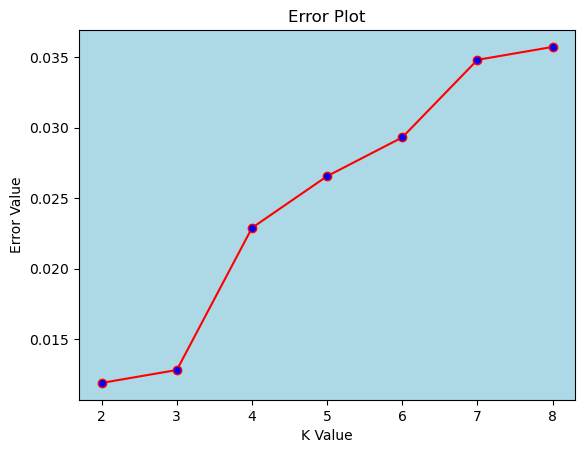

In [2523]:
from sklearn import neighbors
error_rate=[]
for i in range(2,9):
    player_yc=neighbors.KNeighborsClassifier(n_neighbors=i)
    player_yc.fit(X_train_df,y_train_df)
    predictions=player_yc.predict(X_test_df)
    error_rate.append(np.mean(predictions!=y_test_df))


plt.plot(range(2,9),error_rate,color="red",marker='o',markerfacecolor='blue',linestyle='-')
plt.title("Error Plot")
plt.xlabel("K Value")
plt.ylabel("Error Value")
plt.gca().set_facecolor("lightblue")
plt.show()

In [2527]:
clf_food=neighbors.KNeighborsClassifier(n_neighbors=2)
model=clf_food.fit(X_train_df,y_train_df)
predict=model.predict(X_test_df)

In [2529]:
print("recall_score:",recall_score(y_test_df,predict,average="micro"))
print("accuracy_score:",accuracy_score(y_test_df,predict))
print("f1_score:",f1_score(y_test_df,predict,average="micro"))
print("precision_score:",precision_score(y_test_df,predict,average="micro"))

recall_score: 0.9880952380952381
accuracy_score: 0.9880952380952381
f1_score: 0.9880952380952381
precision_score: 0.9880952380952381


Intrepretation:
- Recall Score is 98.8% so, the model correctly identifies 98.8% of actual positive cases.
- Precision Score 98.8% so, When the model predicts positive, it is correct 98.81% of the time.
- F1 Score 98.8% so,the balance between precision and recall is very high.
- Accuracy Score which is 98.8% so, the model acurately find 98.81% of actual positive cases.

# Sprint - 8 
# Referee Analysis

1) Which referees issue the most yellow cards overall?

In [2536]:
referee_yellow = merged_data.groupby('referee')['yellow_cards'].sum()
referee_yellow = pd.DataFrame(referee_yellow)
referee_yellow = referee_yellow.sort_values(by='yellow_cards', ascending=False)
referee_yellow_10 = referee_yellow.head(10)
referee_yellow_10

,yellow_cards
referee,
Felix Zwayer,64
Tobias Stieler,53
Guido Winkmann,45
Mikkel Redder,38
Manuel Graofe,30
Daniel Siebert,28
Dr. Felix Brych,26
Deniz Aytekin,25
Christian Dingert,20


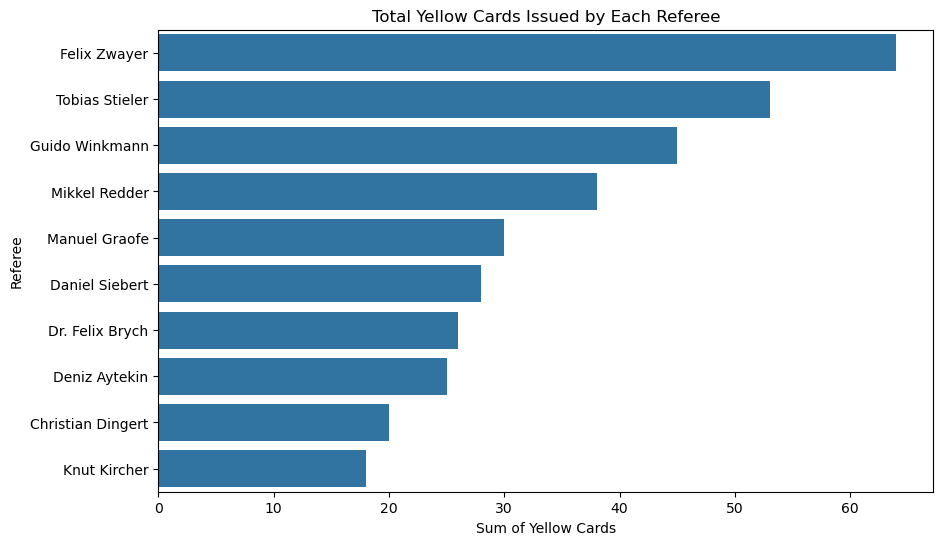

In [2537]:
plt.figure(figsize=(10, 6))
sns.barplot(data=referee_yellow_10, x='yellow_cards', y='referee', orient='h')
plt.title("Total Yellow Cards Issued by Each Referee")
plt.xlabel("Sum of Yellow Cards")
plt.ylabel("Referee")
plt.show()

2) Which Referees Officiate the Highest Number of Matches?

In [2539]:
referee_matches = merged_data.groupby('referee')['game_id_x'].nunique().reset_index()
referee_matches = referee_matches.rename(columns={'game_id_x': 'match_count'})
referee_matches = referee_matches.sort_values(by='match_count', ascending=False)
referee_matches_10 = referee_matches.head(10)
referee_matches_10

,referee,match_count
42,Felix Zwayer,15
76,Manuel Graofe,14
36,Dr. Felix Brych,12
124,Tobias Stieler,12
27,Daniel Siebert,12
48,Guido Winkmann,9
77,Marco Fritz,8
112,Sascha Stegemann,7
32,Deniz Aytekin,7
22,Christian Dingert,7


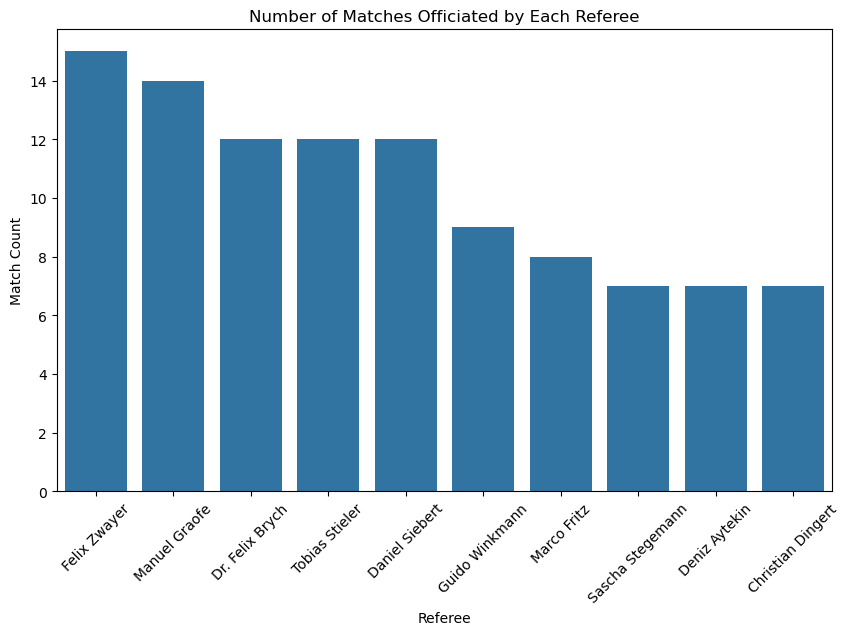

In [2540]:
plt.figure(figsize=(10, 6))
sns.barplot(data=referee_matches_10, x='referee', y='match_count')
plt.xticks(rotation=45)
plt.title("Number of Matches Officiated by Each Referee")
plt.xlabel("Referee")
plt.ylabel("Match Count")
plt.show()

# Substitution Analysis

1) At which minutes do most substitutions occur?

In [2544]:
# Filter rows where a substitution occurred (player_in_id not null)
subs_df = merged_data[merged_data['player_in_id'].notnull()]
subs_df.head(2)

,appearance_id,game_id_x,player_id,competition_id_x,yellow_cards,red_cards,goals,assists,minutes_played,season,...,player_code,country_of_birth,date_of_birth,sub_position,position_y,foot,height_in_cm,market_value_in_eur,highest_market_value_in_eur,contract_expiration_date
0,2231426_49723,2231426,49723,L1,0,0,0,0,70,2012,...,timothy-chandler,Germany,1990-03-29,Right-Back,Defender,right,186.0,700000.0,5000000.0,2025-06-30
1,2231426_49723,2231426,49723,L1,0,0,0,0,70,2012,...,timothy-chandler,Germany,1990-03-29,Right-Back,Defender,right,186.0,700000.0,5000000.0,2025-06-30


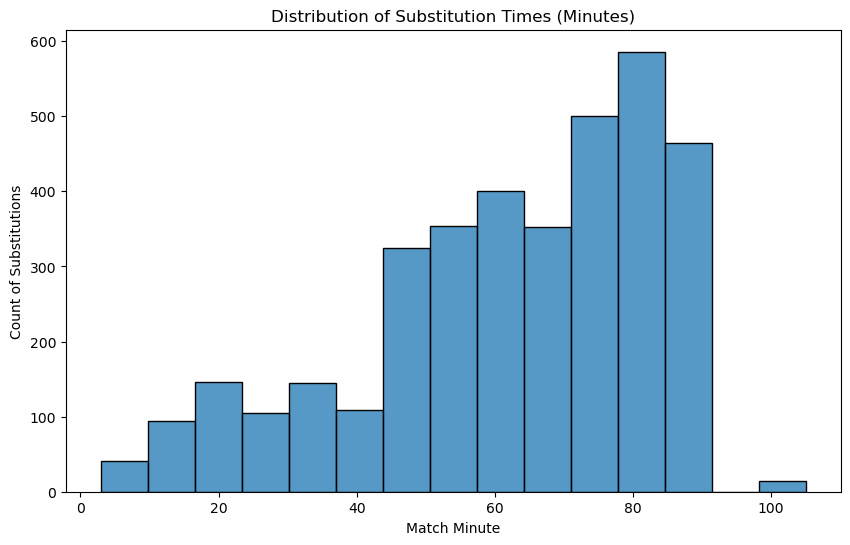

In [2545]:
plt.figure(figsize=(10, 6))
sns.histplot(subs_df['minute'], bins=15)
plt.title("Distribution of Substitution Times (Minutes)")
plt.xlabel("Match Minute")
plt.ylabel("Count of Substitutions")
plt.show()

2)How do substitution counts vary by round?

In [2547]:
subs_df = merged_data[merged_data['player_in_id'].notnull()]
subs_by_round = subs_df.groupby('round')['player_in_id'].count().reset_index()
subs_by_round = subs_by_round.rename(columns={'player_in_id': 'num_subs'})
subs_by_round_20 = subs_by_round.head(20)
subs_by_round_20

,round,num_subs
0,1. Matchday,189
1,10. Matchday,77
2,11. Matchday,60
3,12. Matchday,46
4,13. Matchday,40
5,14. Matchday,62
6,15. Matchday,118
7,16. Matchday,117
8,17. Matchday,133
9,18. Matchday,95


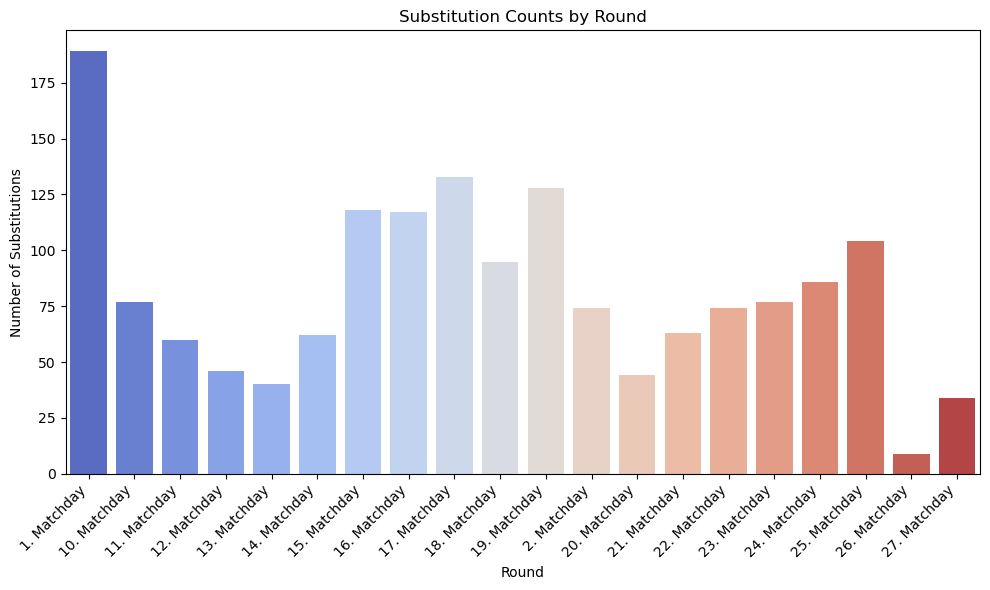

In [2549]:
plt.figure(figsize=(10, 6))
sns.barplot(data=subs_by_round_20, x='round', y='num_subs', palette='coolwarm')
plt.xticks(rotation=45, ha='right')
plt.title("Substitution Counts by Round")
plt.xlabel("Round")
plt.ylabel("Number of Substitutions")
plt.tight_layout()
plt.show()

# Event Analysis

1) What is the distribution of event types across the dataset?

In [2553]:
events_count = merged_data.groupby('type_x')['game_event_id'].count().reset_index()
events_count = events_count.rename(columns={'game_event_id': 'event_frequency'})
events_count

,type_x,event_frequency
0,Cards,92
1,Goals,1250
2,Substitutions,2295


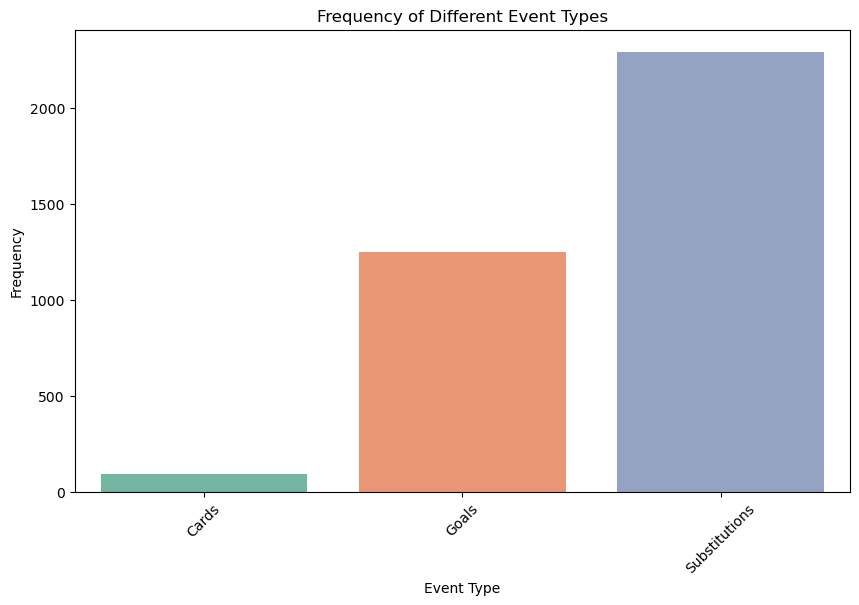

In [2554]:
plt.figure(figsize=(10, 6))
sns.barplot(data=events_count, x='type_x', y='event_frequency', palette='Set2')
plt.xticks(rotation=45)
plt.title("Frequency of Different Event Types")
plt.xlabel("Event Type")
plt.ylabel("Frequency")
plt.show()

2)  How do events vary by match minute?

In [2556]:
events_minute = merged_data.groupby(['minute', 'type_x'])['game_event_id'].count()
events_minute = pd.DataFrame(events_minute)
events_minute = events_minute.rename(columns={'game_event_id': 'event_count'})
events_minute

event_count
minute type_x                    
3      Goals                   12
5      Goals                   14
6      Goals                   14
7      Goals                    1
10     Substitutions            6
...                           ...
89     Substitutions           16
90     Cards                   12
       Goals                   65
       Substitutions          115
105    Goals                   14

[131 rows x 1 columns]

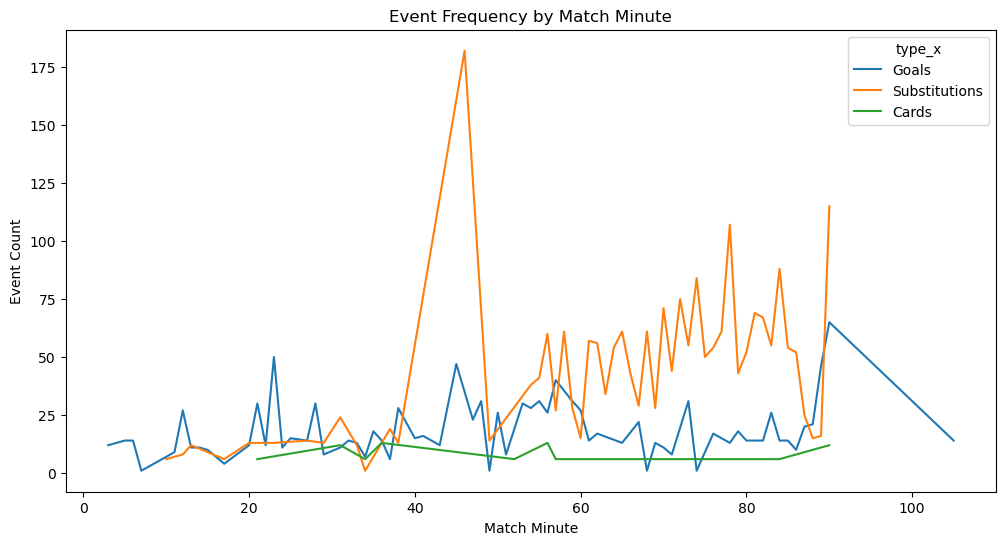

In [2558]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=events_minute, x='minute', y='event_count', hue='type_x')
plt.title("Event Frequency by Match Minute")
plt.xlabel("Match Minute")
plt.ylabel("Event Count")
plt.show()

# Event Analysis
# Hypothesis

if there is a significant difference in the number of goals scored by the players of different prefereed foot? could be left or right select 35 random samples of number of goals scored by the players from the given data. use 5% significant level for the test

- H0: There is no significant difference in the number of goals scored by the players of different preferred foot
- H1: There is a significant difference in the number of goals scored by the players of different prefereed foot

In [2564]:
foot_left=merged_data[merged_data['foot']=='left']
foot_left

,appearance_id,game_id_x,player_id,competition_id_x,yellow_cards,red_cards,goals,assists,minutes_played,season,...,player_code,country_of_birth,date_of_birth,sub_position,position_y,foot,height_in_cm,market_value_in_eur,highest_market_value_in_eur,contract_expiration_date
72,2321034_124732,2321034,124732,L1,0,0,1,0,90,2013,...,john-anthony-brooks,Germany,1993-01-28,Centre-Back,Defender,left,194.0,2000000.0,15000000.0,2024-06-30
73,2321034_124732,2321034,124732,L1,0,0,1,0,90,2013,...,john-anthony-brooks,Germany,1993-01-28,Centre-Back,Defender,left,194.0,2000000.0,15000000.0,2024-06-30
74,2321034_124732,2321034,124732,L1,0,0,1,0,90,2013,...,john-anthony-brooks,Germany,1993-01-28,Centre-Back,Defender,left,194.0,2000000.0,15000000.0,2024-06-30
75,2321034_124732,2321034,124732,L1,0,0,1,0,90,2013,...,john-anthony-brooks,Germany,1993-01-28,Centre-Back,Defender,left,194.0,2000000.0,15000000.0,2024-06-30
76,2321034_124732,2321034,124732,L1,0,0,1,0,90,2013,...,john-anthony-brooks,Germany,1993-01-28,Centre-Back,Defender,left,194.0,2000000.0,15000000.0,2024-06-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3381,3203733_124732,3203733,124732,L1,0,0,0,0,74,2019,...,john-anthony-brooks,Germany,1993-01-28,Centre-Back,Defender,left,194.0,2000000.0,15000000.0,2024-06-30
3382,3203733_124732,3203733,124732,L1,0,0,0,0,74,2019,...,john-anthony-brooks,Germany,1993-01-28,Centre-Back,Defender,left,194.0,2000000.0,15000000.0,2024-06-30
3383,3203733_124732,3203733,124732,L1,0,0,0,0,74,2019,...,john-anthony-brooks,Germany,1993-01-28,Centre-Back,Defender,left,194.0,2000000.0,15000000.0,2024-06-30
3384,3203733_124732,3203733,124732,L1,0,0,0,0,74,2019,...,john-anthony-brooks,Germany,1993-01-28,Centre-Back,Defender,left,194.0,2000000.0,15000000.0,2024-06-30


In [2565]:
goals_foot=foot_left[['goals']]

In [2566]:
p1_mean=st.mean(goals_foot['goals'])
p1_mean

0.35221238938053095

In [2568]:
p1_std=st.stdev(goals_foot["goals"])
p1_std

0.47808300436858164

In [2569]:
p1_var=st.variance(goals_foot["goals"])
p1_var

0.22856335906608924

In [2571]:
sample_df=goals_foot.sample(n=30,replace=True,random_state=1,ignore_index = True)
sample_df

,goals
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,1
8,1
9,1


In [2572]:
s1_mean=st.mean(sample_df["goals"])
s1_mean

0.4666666666666667

In [2574]:
s1_std=st.stdev(sample_df['goals'])
s1_std

0.5074162634049248

In [2576]:
s1_var=st.variance(sample_df["goals"])
s1_var

0.2574712643678161

In [2577]:
foot_right=merged_data[merged_data["foot"]=="right"]
foot_right

,appearance_id,game_id_x,player_id,competition_id_x,yellow_cards,red_cards,goals,assists,minutes_played,season,...,player_code,country_of_birth,date_of_birth,sub_position,position_y,foot,height_in_cm,market_value_in_eur,highest_market_value_in_eur,contract_expiration_date
0,2231426_49723,2231426,49723,L1,0,0,0,0,70,2012,...,timothy-chandler,Germany,1990-03-29,Right-Back,Defender,right,186.0,700000.0,5000000.0,2025-06-30
1,2231426_49723,2231426,49723,L1,0,0,0,0,70,2012,...,timothy-chandler,Germany,1990-03-29,Right-Back,Defender,right,186.0,700000.0,5000000.0,2025-06-30
2,2231426_49723,2231426,49723,L1,0,0,0,0,70,2012,...,timothy-chandler,Germany,1990-03-29,Right-Back,Defender,right,186.0,700000.0,5000000.0,2025-06-30
3,2231426_49723,2231426,49723,L1,0,0,0,0,70,2012,...,timothy-chandler,Germany,1990-03-29,Right-Back,Defender,right,186.0,700000.0,5000000.0,2025-06-30
4,2231426_49723,2231426,49723,L1,0,0,0,0,70,2012,...,timothy-chandler,Germany,1990-03-29,Right-Back,Defender,right,186.0,700000.0,5000000.0,2025-06-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3632,3415291_537467,3415291,537467,BE1,0,0,1,0,77,2020,...,joseph-efford,United States,1996-08-29,Centre-Forward,Attack,right,176.0,300000.0,600000.0,2026-06-30
3633,3415291_537467,3415291,537467,BE1,0,0,1,0,77,2020,...,joseph-efford,United States,1996-08-29,Centre-Forward,Attack,right,176.0,300000.0,600000.0,2026-06-30
3634,3415291_537467,3415291,537467,BE1,0,0,1,0,77,2020,...,joseph-efford,United States,1996-08-29,Centre-Forward,Attack,right,176.0,300000.0,600000.0,2026-06-30
3635,3415291_537467,3415291,537467,BE1,0,0,1,0,77,2020,...,joseph-efford,United States,1996-08-29,Centre-Forward,Attack,right,176.0,300000.0,600000.0,2026-06-30


In [2578]:
goals_right=foot_right[["goals"]]
goals_right

,goals
0,0
1,0
2,0
3,0
4,0
...,...
3632,1
3633,1
3634,1
3635,1


In [2579]:
p2_mean=st.mean(goals_right["goals"])
p2_mean

0.5090549884754693

In [2580]:
p2_std=st.stdev(goals_right["goals"])
print(p2_std)

0.6326120089173075


In [2581]:
p2_var=st.variance(goals_right["goals"])
p2_var

0.4001979538263915

In [2582]:
sample_df_right = goals_right.sample(n=30,replace=True,random_state=1,ignore_index = True)
sample_df_right

,goals
0,1
1,0
2,1
3,0
4,1
5,1
6,1
7,1
8,1
9,0


In [2584]:
s2_mean=st.mean(sample_df_right["goals"])
print('sample_mean:',s2_mean)
s2_std=st.stdev(sample_df_right["goals"])
print('sample_std:',s2_mean)
s2_var=st.variance(sample_df_right["goals"])
print('sample_variance:',s2_var)
n1=len(sample_df_right)
n2=len(sample_df_right)
dof=n1+n2-2
print("dof:",dof)

sample_mean: 0.5
sample_std: 0.5
sample_variance: 0.25862068965517243
dof: 58


In [2585]:
x1=s1_mean
x2=s2_mean
p1=p1_mean
p2=p2_mean
v1=s1_var
v2=s2_var
alpha=0.5

In [2586]:
signal=abs(x1-x2)
print('singnal:',signal)
noise=m.sqrt((v1*(n1-1+(v2*(n2-2)))*((1/n1+1/n2))))
print('noise:',noise)

singnal: 0.033333333333333326
noise: 0.7887168378012519


In [2587]:
t_statistics=signal/noise
print("The t_statistics values are:",t_statistics)

The t_statistics values are: 0.042262738331108086


In [2588]:
p_value=t.sf(abs(t_statistics),dof)
print("The p_values are:",p_value)

The p_values are: 0.4832172032326666


In [2589]:
t_critical=norm.ppf(alpha/2,dof)
print("The t_critical values are:",t_critical)

The t_critical values are: 57.32551024980392


- Alpha value is greater than p_value so,we have reject the null hypothesis.

# Competition Analysis

1) Which competition has the highest average goals per match?

In [2596]:
merged_data['total_goals'] = merged_data['home_club_goals'] + merged_data['away_club_goals']
comp_goals = merged_data.groupby('competition_id_x')['total_goals'].mean().reset_index()
comp_goals = comp_goals.sort_values('total_goals', ascending=False)
comp_goals

,competition_id_x,total_goals
17,USC,13.000000
3,DFL,13.000000
14,NLP,6.875000
7,ELQ,5.000000
5,DKP,4.885246
2,DFB,4.574879
10,FRCH,4.000000
13,NL1,3.889908
11,GB1,3.592068
12,L1,3.445956


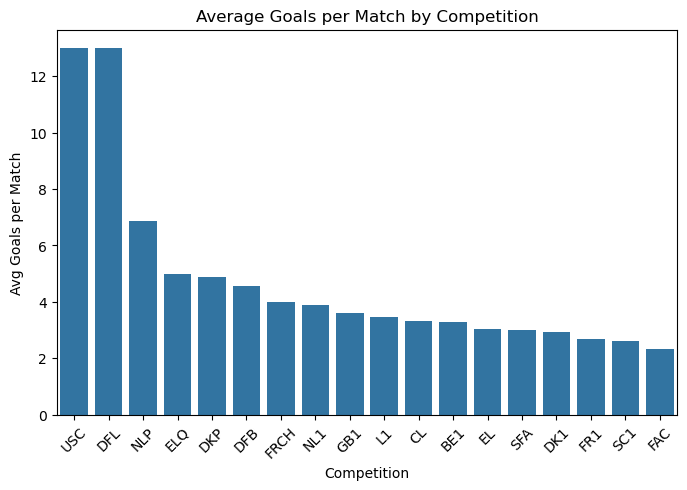

In [2597]:
plt.figure(figsize=(8, 5))
sns.barplot(data=comp_goals, x='competition_id_x', y='total_goals')
plt.title("Average Goals per Match by Competition")
plt.xlabel("Competition")
plt.ylabel("Avg Goals per Match")
plt.xticks(rotation=45)
plt.show()

 2) Which competition has the highest average attendance?

In [2600]:
comp_attendance = merged_data.groupby('competition_id_x')['attendance'].mean().reset_index()
comp_attendance = comp_attendance.sort_values('attendance', ascending=False,ignore_index = True)
comp_attendance

,competition_id_x,attendance
0,DFL,81360.000000
1,CL,50920.225124
2,L1,50127.357606
3,FRCH,41237.000000
4,USC,38434.000000
5,FAC,32421.794748
6,SFA,29941.000000
7,GB1,29652.796067
8,DFB,28821.342995
9,EL,28374.096203


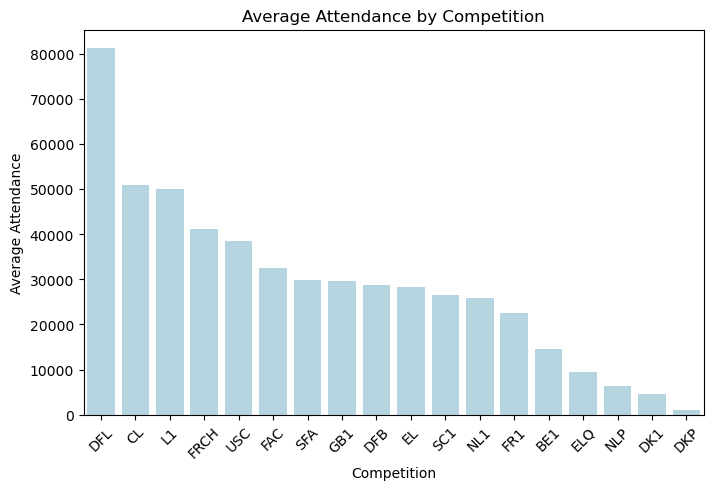

In [2601]:
plt.figure(figsize=(8, 5))
sns.barplot(data=comp_attendance, x='competition_id_x', y='attendance', color = 'lightblue')
plt.title("Average Attendance by Competition")
plt.xlabel("Competition")
plt.ylabel("Average Attendance")
plt.xticks(rotation=45)
plt.show()

# Player Attributes and Demographics

1. What is the distribution of foot preference among players?

In [2604]:
count_of_foot= merged_data['foot'].value_counts().reset_index()
count_of_foot.columns = ['foot_preference', 'count']
count_of_foot

,foot_preference,count
0,right,3037
1,left,565
2,both,35


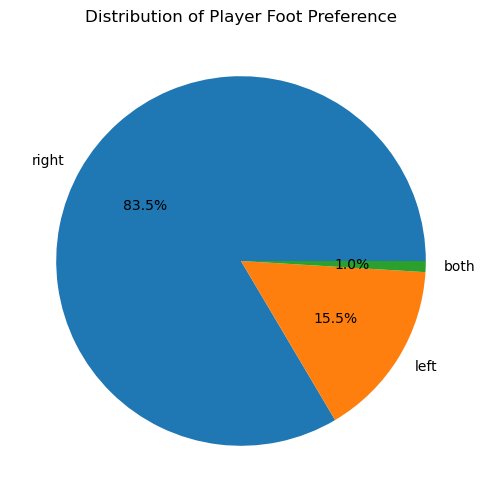

In [2607]:
colors = ['green','brown','lightblue']
plt.figure(figsize=(6, 6))
plt.pie(count_of_foot['count'], labels=count_of_foot['foot_preference'], autopct='%1.1f%%')
plt.title("Distribution of Player Foot Preference")
plt.show()

2. How does player age distribute across the dataset?

In [2612]:
from datetime import datetime
today = datetime.today()
merged_data['age'] = today.year - merged_data['date_of_birth'].dt.year 
merged_data[['age']]

,age
0,35
1,35
2,35
3,35
4,35
...,...
3632,29
3633,29
3634,29
3635,29


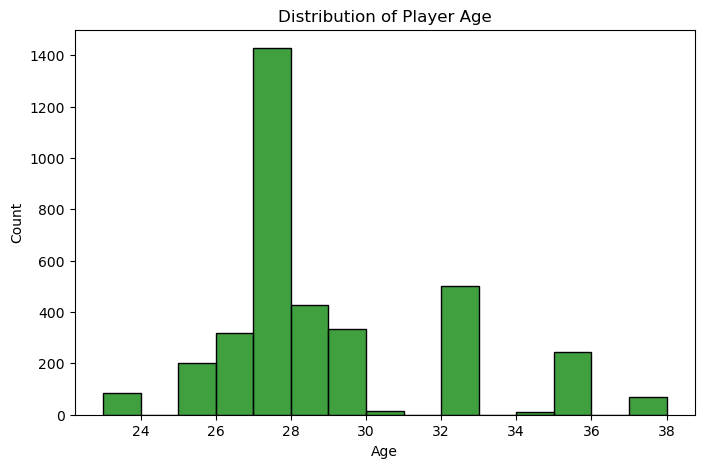

In [2615]:
plt.figure(figsize=(8, 5))
sns.histplot(merged_data['age'], bins=15, color='green')
plt.title("Distribution of Player Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

# Contract Management Analysis

 1. What is the distribution of contract expiration dates?

In [2622]:
merged_data['contract_year'] = merged_data['contract_expiration_date'].dt.year
contract_counts = merged_data.groupby('contract_year')['player_id'].nunique().reset_index()
contract_counts.columns = ['contract_year', 'player_count']
contract_counts

,contract_year,player_count
0,2024,9
1,2025,5
2,2026,3
3,2027,5
4,2028,2


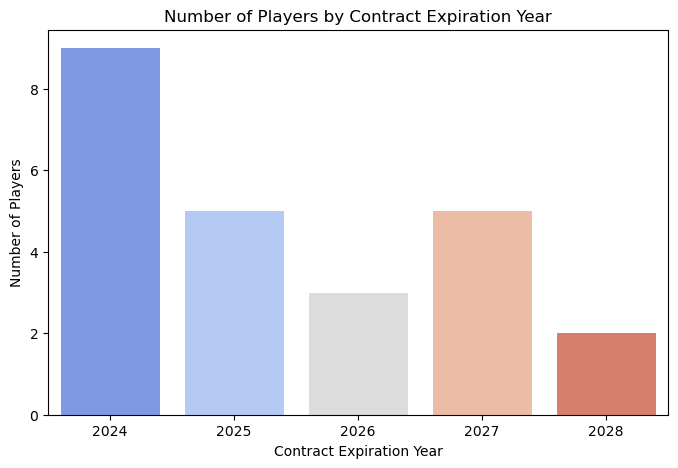

In [2625]:
plt.figure(figsize=(8, 5))
sns.barplot(data=contract_counts, x='contract_year', y='player_count', palette='coolwarm')
plt.title("Number of Players by Contract Expiration Year")
plt.xlabel("Contract Expiration Year")
plt.ylabel("Number of Players")
plt.show()

2. How does contract expiry relate to market value?

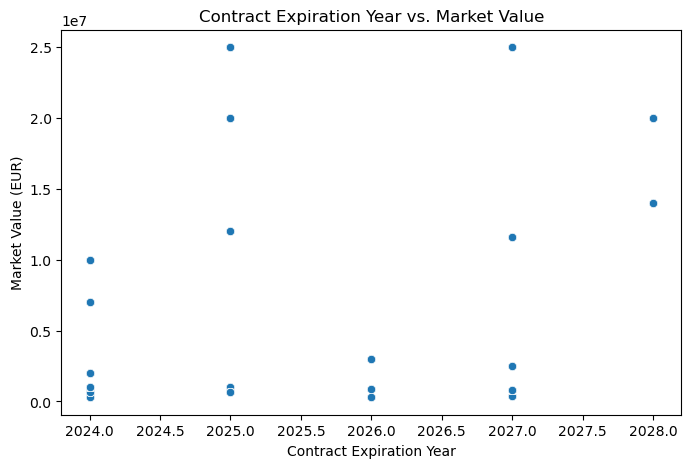

In [2635]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=merged_data, x='contract_year', y='market_value_in_eur')
plt.title("Contract Expiration Year vs. Market Value")
plt.xlabel("Contract Expiration Year")
plt.ylabel("Market Value (EUR)")
plt.show()

# Kmean Clustering

identify groups of players on their attributes(foot),(height) and demographics(country of birth)

In [2638]:
needed_kmeans=merged_data[["height_in_cm","foot","country_of_birth"]]
needed_kmeans

,height_in_cm,foot,country_of_birth
0,186.0,right,Germany
1,186.0,right,Germany
2,186.0,right,Germany
3,186.0,right,Germany
4,186.0,right,Germany
...,...,...,...
3632,176.0,right,United States
3633,176.0,right,United States
3634,176.0,right,United States
3635,176.0,right,United States


In [2639]:
test_kmeans=test_df[["height_in_cm","foot","country_of_birth"]]
test_kmeans

,height_in_cm,foot,country_of_birth
0,177,right,United States
1,177,right,United States


In [2640]:
kmeans_df=pd.concat([needed_kmeans,test_kmeans],axis=0)
kmeans_df

,height_in_cm,foot,country_of_birth
0,186.0,right,Germany
1,186.0,right,Germany
2,186.0,right,Germany
3,186.0,right,Germany
4,186.0,right,Germany
...,...,...,...
3634,176.0,right,United States
3635,176.0,right,United States
3636,176.0,right,United States
0,177.0,right,United States


In [2642]:
kmeans_df["country_of_birth_c"]=label_encoder.fit_transform(kmeans_df["country_of_birth"])
kmeans_df["foot_c"]=label_encoder.fit_transform(kmeans_df["foot"])

In [2643]:
kmeans_df

,height_in_cm,foot,country_of_birth,country_of_birth_c,foot_c
0,186.0,right,Germany,1,2
1,186.0,right,Germany,1,2
2,186.0,right,Germany,1,2
3,186.0,right,Germany,1,2
4,186.0,right,Germany,1,2
...,...,...,...,...,...
3634,176.0,right,United States,4,2
3635,176.0,right,United States,4,2
3636,176.0,right,United States,4,2
0,177.0,right,United States,4,2


In [2644]:
kmeans_drop_df=kmeans_df.drop(["country_of_birth","foot"],axis=1)

In [2646]:
kmeans_drop_df

,height_in_cm,country_of_birth_c,foot_c
0,186.0,1,2
1,186.0,1,2
2,186.0,1,2
3,186.0,1,2
4,186.0,1,2
...,...,...,...
3634,176.0,4,2
3635,176.0,4,2
3636,176.0,4,2
0,177.0,4,2


In [2647]:
scale=StandardScaler()
df_scaled_kmean=scale.fit_transform(kmeans_drop_df)
df_scaled_kmean=pd.DataFrame(df_scaled_kmean,columns=kmeans_drop_df.columns)
df_scaled_kmean

,height_in_cm,country_of_birth_c,foot_c
0,0.680466,-1.693395,0.431836
1,0.680466,-1.693395,0.431836
2,0.680466,-1.693395,0.431836
3,0.680466,-1.693395,0.431836
4,0.680466,-1.693395,0.431836
...,...,...,...
3634,-0.882407,0.650563,0.431836
3635,-0.882407,0.650563,0.431836
3636,-0.882407,0.650563,0.431836
3637,-0.726120,0.650563,0.431836


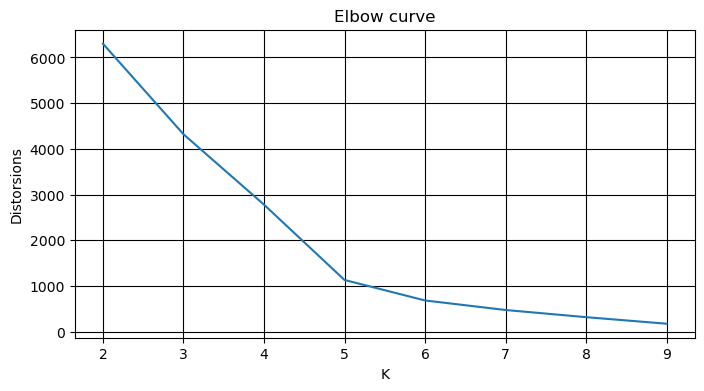

In [2648]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

Distorsions =[]
for k in range(2,10):
    KMeans_model=KMeans(n_clusters=k)
    KMeans_model.fit(df_scaled_kmean)
    Distorsions.append(KMeans_model.inertia_)
plt.figure(figsize=(8,4))
plt.plot(range(2,10),Distorsions)
plt.grid(True,c="black")
plt.xlabel("K")
plt.ylabel("Distorsions")
plt.title("Elbow curve")
plt.show()

In [2688]:
KMean_model=KMeans(n_clusters=5,random_state=10)
KMean_model.fit(df_scaled_kmean)

KMeans(n_clusters=5, random_state=10)

In [2690]:
KMean_centroid=KMean_model.cluster_centers_
print(KMean_centroid)

[[-0.56983269 -0.91207583  0.43183592]
 [ 0.83196768  0.65056256  0.22779492]
 [ 1.8032254  -1.48086001 -2.26728217]
 [-0.84038062  0.61538913  0.21793405]
 [ 0.65304763 -1.88529798  0.43183592]]


In [2691]:
labels=KMean_model.labels_
labels

array([4, 4, 4, ..., 3, 3, 3])

In [2694]:
Labels_df=pd.DataFrame(labels,columns=["Label"])
Labels_df

,Label
0,4
1,4
2,4
3,4
4,4
...,...
3634,3
3635,3
3636,3
3637,3


# Calinski_harabasz_score & davies_bouldin_score

In [2697]:
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score

In [2699]:
calinski_score=calinski_harabasz_score(df_scaled_kmean,Labels_df)
calinski_score

4059.517520365021

In [2701]:
davies_score=davies_bouldin_score(df_scaled_kmean,Labels_df)
davies_score

0.4835139736444661

Interpretation:
- if the calinski score is higher than the davies score it indicates better cluster.
- In this case,the calinski score is  it is good performing performance.

# Viva

In [2706]:
merged_data

,appearance_id,game_id_x,player_id,competition_id_x,yellow_cards,red_cards,goals,assists,minutes_played,season,...,sub_position,position_y,foot,height_in_cm,market_value_in_eur,highest_market_value_in_eur,contract_expiration_date,total_goals,age,contract_year
0,2231426_49723,2231426,49723,L1,0,0,0,0,70,2012,...,Right-Back,Defender,right,186.0,700000.0,5000000.0,2025-06-30,3,35,2025
1,2231426_49723,2231426,49723,L1,0,0,0,0,70,2012,...,Right-Back,Defender,right,186.0,700000.0,5000000.0,2025-06-30,3,35,2025
2,2231426_49723,2231426,49723,L1,0,0,0,0,70,2012,...,Right-Back,Defender,right,186.0,700000.0,5000000.0,2025-06-30,3,35,2025
3,2231426_49723,2231426,49723,L1,0,0,0,0,70,2012,...,Right-Back,Defender,right,186.0,700000.0,5000000.0,2025-06-30,3,35,2025
4,2231426_49723,2231426,49723,L1,0,0,0,0,70,2012,...,Right-Back,Defender,right,186.0,700000.0,5000000.0,2025-06-30,3,35,2025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3632,3415291_537467,3415291,537467,BE1,0,0,1,0,77,2020,...,Centre-Forward,Attack,right,176.0,300000.0,600000.0,2026-06-30,5,29,2026
3633,3415291_537467,3415291,537467,BE1,0,0,1,0,77,2020,...,Centre-Forward,Attack,right,176.0,300000.0,600000.0,2026-06-30,5,29,2026
3634,3415291_537467,3415291,537467,BE1,0,0,1,0,77,2020,...,Centre-Forward,Attack,right,176.0,300000.0,600000.0,2026-06-30,5,29,2026
3635,3415291_537467,3415291,537467,BE1,0,0,1,0,77,2020,...,Centre-Forward,Attack,right,176.0,300000.0,600000.0,2026-06-30,5,29,2026


In [2714]:
merged_data.iloc[5,0:5]

appearance_id       2231426_49723
game_id_x                 2231426
player_id                   49723
competition_id_x               L1
yellow_cards                    0
Name: 5, dtype: object

In [2716]:
merged_data.loc[5,["appearance_id"]]

appearance_id    2231426_49723
Name: 5, dtype: object

In [2720]:
merged_data=merged_data.rename({"appearance_id":"a_id"},axis=1)
merged_data

,a_id,game_id_x,player_id,competition_id_x,yellow_cards,red_cards,goals,assists,minutes_played,season,...,sub_position,position_y,foot,height_in_cm,market_value_in_eur,highest_market_value_in_eur,contract_expiration_date,total_goals,age,contract_year
0,2231426_49723,2231426,49723,L1,0,0,0,0,70,2012,...,Right-Back,Defender,right,186.0,700000.0,5000000.0,2025-06-30,3,35,2025
1,2231426_49723,2231426,49723,L1,0,0,0,0,70,2012,...,Right-Back,Defender,right,186.0,700000.0,5000000.0,2025-06-30,3,35,2025
2,2231426_49723,2231426,49723,L1,0,0,0,0,70,2012,...,Right-Back,Defender,right,186.0,700000.0,5000000.0,2025-06-30,3,35,2025
3,2231426_49723,2231426,49723,L1,0,0,0,0,70,2012,...,Right-Back,Defender,right,186.0,700000.0,5000000.0,2025-06-30,3,35,2025
4,2231426_49723,2231426,49723,L1,0,0,0,0,70,2012,...,Right-Back,Defender,right,186.0,700000.0,5000000.0,2025-06-30,3,35,2025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3632,3415291_537467,3415291,537467,BE1,0,0,1,0,77,2020,...,Centre-Forward,Attack,right,176.0,300000.0,600000.0,2026-06-30,5,29,2026
3633,3415291_537467,3415291,537467,BE1,0,0,1,0,77,2020,...,Centre-Forward,Attack,right,176.0,300000.0,600000.0,2026-06-30,5,29,2026
3634,3415291_537467,3415291,537467,BE1,0,0,1,0,77,2020,...,Centre-Forward,Attack,right,176.0,300000.0,600000.0,2026-06-30,5,29,2026
3635,3415291_537467,3415291,537467,BE1,0,0,1,0,77,2020,...,Centre-Forward,Attack,right,176.0,300000.0,600000.0,2026-06-30,5,29,2026
